# [Техническое задание](https://docs.google.com/document/d/1ZIu6daXZRuDR796AHjKCku643hlM3xgYxW9E84DBJFc/edit?usp=sharing)

**Проект:** Классификация аудиозвонков на целевые и нецелевые.

**Цель проекта:** Разработать нейронную сеть, способную классифицировать аудиозвонки на целевые и нецелевые на основе предоставленной базы данных и csv-таблицы с описаниями и метками классов.

**Введение:**

Входной набор данных представляет из себя два набора файлов:

> a)	[Первый набор файлов](https://drive.google.com/drive/folders/1cQWMpQkscZJbbOTxiJNy0o3nuaeIiB1P?usp=sharing) - это выгрузки в формате `CSV` с информацией по звонкам, а так же с проставленным статусом `“целевой/нецелевой”` в отдельном столбце (обратите внимание, что по проекту `“Павелецкая сити”` две выгрузки - эти наборы данных отличаются и относятся к разным наборам клиентов внутри одного и того же проекта).

> b)	[Второй набор файлов](https://drive.google.com/drive/folders/1K3jGCH60uzFcsI3aj89VIXOOFEXvZxD6?usp=sharing) - аудиозаписи звонков. Они хранятся в корневом каталоге в одноимённых папках. К примеру, в папке `“Записи звонков_павелецкая сити”` лежат записи звонков по проекту `“Павелецкая Сити”`.

**Требования:**

1.   Нейронная сеть должна быть спроектирована и обучена для точной классификации аудиозвонков на два класса: целевые и нецелевые (с точностью `90+%`).
2.   Необходимо обеспечить интеграцию модели через `API`.
3.   Модель должна быть оптимизирована для обработки большого объёма данных.
4.   Код должен быть написан с соблюдением стандартов кодирования, и должна быть составлена подробная техническая документация.
5.   Код должен включать в себя систему журналирования для фиксации ошибок.
6.   Код должен принимать на вход регулярное выражение, по которому будет осуществляться проверка столбца `“теги”` в выгрузках `CSV` для определения статуса звонка `“целевой/нецелевой”`:

>> a)	по проектам `“Примавера”` и `“Павелецкая сити”` наличие в столбце с тегами подстроки `“Целевой_М108“` будет равняться тому, что данный звонок целевой (пример регулярного выражения: `.*Целевой_М108.*`);

>> b)	по проекту `“Хедлайнер”` - наличие в столбце с тегами подстроки `“первичный целевой“` будет равняться тому, что данный звонок целевой.

7.   После реализации необходимо иметь возможность получения поддержки по предоставленному решению в течение `2 месяцев`.

Список рекомендуемых параметров для звуковой записи (данный список носит информационный характер и не является обязательным):

*   Эмоция (базовые 11: радость; печаль; гнев; отвращение; удивление; страдание (горе); волнение (интерес); презрение; смущение; стыд; вина).
*   Пол.
*   Возраст.
*   Семантический анализ диалога (по конкретным ключевым словам и/или по тематикам диалогов).
*   Характеристики, присутствующие в `CSV`/`XLSX` таблицах.

# Критерии классификации

Критерии `уникально-целевого` обращения:
1. Длительность звонка должна быть не менее `75 секунд`;
2. Телефонный номер абонента должен быть `уникальным`, т. е. его не должно быть в `CRM` заказчика. Либо, по нему не должно быть активности за последние `90 дней`. Исключение составляют `топовые площадки`, работающие по своим критериям (`ЦИАН`, `Яндекс.Недвижимость`, `Авито`, и т. д.);
3. Клиент должен знать минимальную информацию об объекте (понимать, куда он звонит): название `ЖК`, расположение, ценовую политику;
4. Номер абонента должен быть доступен в течение `15 дней` после совершённого звонка (при этом со стороны заказчика должно быть обеспечено `2 попытки` исходящего звонка в течение указанного срока);
5. Клиент должен быть `«адекватным»`. Не общаться на повышенных тонах, не употреблять ненормативную лексику и т. д.;
6. Клиент не должен быть повторным. Например, клиент `уже` купил квартиру и через `90 дней` решил купить машиноместо;
7. Заявка. В заявке должен быть указан номер телефона, а абонент при контакте с менеджером должен соответствовать всем критериям `уникально-целевого` обращения, перечисленным выше;
8. Озвученный общий бюджет покупки не должен быть `ниже 90%` от стоимости квартиры или коммерческого помещения, соответствующих площади/комнатности на момент обращения;
9. В случае, если клиент является уникальным, интересуется покупкой недвижимости, не является представителем партнёров или исполнителей и изъявил желание посетить офис продаж. При этом не обязательна фиксация уровня знания клиента об объекте в диалоге. При этом источник не должен относиться к каналам `«лидогенерация»` или `«тематические площадки»`;
10. Основной целью звонка клиента не должна являться покупка/аренда исключительно нежилого помещения, если это не являлось целью проводимой рекламной кампании.

Критерии НЕ `уникально-целевого` (вторичного) обращения:
1. Клиент позвонил повторно менее чем через `3 месяца` (`90 дней`) с момента последнего обращения;
2. Клиент, либо члены его семьи, уже купил (купили) `квартиру`/`машиноместо`/`кладовое помещение`, и хочет (хотят) совершить ещё одну покупку. В данном случае клиент относится к показателю `LTV` (показатель прибыли, которую компания получает от одного клиента за всё время работы с ним).

# [Датафреймы](https://drive.google.com/drive/folders/111abiHt33Q-SV48pBPhEgDCZDI5KshnF?usp=sharing)

## Headliner

*   [`Headliner_df.pkl` Информация о звонках `Headliner`](https://drive.google.com/file/d/13mUHwvx79O4P-AucRdjBYkN5ha8LnCSp/view?usp=sharing)
*   [`Headliner_new_df.pkl` Информация о новых звонках `Headliner`](https://drive.google.com/file/d/1-Q1BxLbot7svY5hiqOquHRFvSOcwtpKS/view?usp=sharing)

*   [`Headliner_calls_df.pkl` Файлы записей звонков `Headliner`](https://drive.google.com/file/d/13pmGEYacsEHjYsIsYgf6fg4MUHAw509y/view?usp=sharing)
*   [`Headliner_new_calls_df.pkl` Файлы записей новых звонков `Headliner`](https://drive.google.com/file/d/1-Ke1q42th_NV0og0e01_-mvJ8HL8JzfS/view?usp=sharing)

## Primavera

*   [`Primavera_df.pkl` Информация о звонках `Primavera`](https://drive.google.com/file/d/1-3csPnjIJXviKJzvbpCfOm29nBgl8L4Q/view?usp=sharing)
*   [`Primavera_new_df.pkl` Информация о новых звонках `Primavera`](https://drive.google.com/file/d/1-QmWkabU2_cyrXPeVaiHSt2e6sLuiCtp/view?usp=sharing)

*   [`Primavera_calls_df.pkl` Файлы записей звонков `Primavera`](https://drive.google.com/file/d/1-CLRfPyaGSc61OopNuFRlWTG-CBCaM1F/view?usp=sharing)
*   [`Primavera_new_calls_df.pkl` Файлы записей новых звонков `Primavera`](https://drive.google.com/file/d/1-Lxa0KifMiByareL94rdEzEpvvMj4D1T/view?usp=sharing)

## Paveletskaya_city

*   [`Paveletskaya_city_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-99dLkSvU3wdwjkGJpwpYUXQjxx8dwEu/view?usp=sharing)
*   [`Paveletskaya_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-D6LlCFXQBMHceujvnq9H8rlx2jAnzmT/view?usp=sharing)
*   [`Paveletskaya_city_new_df.pkl` Информация о новых звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Rtw9a1no3mKatUjc_FNv_bgUBdNrs_d/view?usp=sharing)

*   [`Paveletskaya_city_calls_df.pkl` Файлы записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-JevsfOpxzLNZmSs34qrswhGzhPwf69S/view?usp=sharing)
*   [`Paveletskaya_city_new_calls_df.pkl` Файлы записей новых звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-ODEeFLv15DN5bfLlwyrTx8D3yxydhP9/view?usp=sharing)

# 3 неделя

In [1]:
!rm -r sample_data

In [2]:
# Подключаем google-диск
from google.colab import drive
drive.mount('/content/drive')
my_drv_path = '/content/drive/MyDrive/'

Mounted at /content/drive


## Библиотеки и переменные

In [3]:
import os            # для работы с операционной системой
import pickle as pkl # для сохранения и загрузки переменных
import pandas as pd  # для работы с таблицами
import numpy  as np  # для работы с массивами
import re            # для работы с регулярными выражениями

# Параметры отображения датафреймов
pd.options.display.max_rows     = 99
pd.options.display.max_columns  = 99
pd.options.display.max_colwidth = 999

work_dir_path              = my_drv_path           + 'media108.ru/Новички/'                # путь к рабочей папке
df_path                    = work_dir_path         + 'Датафреймы/'                         # путь к папке для датафреймов
table_path                 = work_dir_path         + 'Таблицы/'                            # путь к папке для таблиц
model_path                 = work_dir_path         + 'Модели/'                             # путь к папке для моделей нейронных сетей
all_dataset_path           = work_dir_path         + 'Датасет/'                            # путь к папке всего датасета в целом
dataset_path               = all_dataset_path      + 'Записи звонков/'                     # путь к записям звонков
dataset_info_path          = dataset_path          + 'Информация о звонках/'               # путь к информации о звонках
dataset_new_path           = all_dataset_path      + 'Новые записи звонков/'               # путь к новым записям звонков
dataset_new_info_path      = dataset_new_path      + 'Информация о звонках/'               # путь к информации о новых звонках
Headliner_path             = dataset_path          + 'Записи звонков_хедлайнер'            # путь к записям звонков проекта Headliner
Headliner_info             = dataset_info_path     + 'Headliner.csv'                       # путь к информации о звонках проекта Headliner
Headliner_new_path         = dataset_new_path      + 'Записи Headliner'                    # путь к записям новых звонков проекта Headliner
Headliner_new_info         = dataset_new_info_path + 'Headliner.xlsx'                      # путь к информации о новых звонках проекта Headliner
Primavera_path             = dataset_path          + 'Записи звонков_primavera'            # путь к записям звонков проекта Primavera
Primavera_info             = dataset_info_path     + 'Primavera .csv'                      # путь к информации о звонках проекта Primavera
Primavera_new_path         = dataset_new_path      + 'Записи Primavera'                    # путь к записям новых звонков проекта Primavera
Primavera_new_info         = dataset_new_info_path + 'Примавера.xlsx'                      # путь к информации о новых звонках проекта Primavera
Paveletskaya_city_path     = dataset_path          + 'Записи звонков_павелецкая сити'      # путь к записям звонков проекта Paveletskaya_city
Paveletskaya_city_info     = dataset_info_path     + 'Павелецкая_ЖК_«Павелецкая_сити».csv' # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_info          = dataset_info_path     + 'Павелецкая (pavcity.turbo.site).csv' # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_city_new_path = dataset_new_path      + 'Записи Павелецкая сити'              # путь к записям новых звонков проекта Paveletskaya_city
Paveletskaya_city_new_info = dataset_new_info_path + 'Павелецкая сити.xlsx'                # путь к информации о новых звонках проекта Paveletskaya_city

## Анализ и первичная предобработка датафреймов с информацией о звонках

### Headliner

#### Загрузка датафреймов

In [ ]:
# Загружаем Headliner_df из pkl
with open(df_path + 'Headliner_df.pkl', 'rb') as f:
  Headliner_df = pkl.load(f)

# Загружаем Headliner_new_df из pkl
with open(df_path + 'Headliner_new_df.pkl', 'rb') as f:
  Headliner_new_df = pkl.load(f)

In [ ]:
# Загружаем Headliner_calls_df из pkl
with open(df_path + 'Headliner_calls_df.pkl', 'rb') as f:
  Headliner_calls_df = pkl.load(f)

# Загружаем Headliner_new_calls_df из pkl
with open(df_path + 'Headliner_new_calls_df.pkl', 'rb') as f:
  Headliner_new_calls_df = pkl.load(f)

#### Первичная предобработка `Headliner_df`

##### Дата и время

In [ ]:
Headliner_df['Дата и время'].head()

0    2023-07-31 20:51:16
1    2023-07-31 19:57:08
2    2023-07-31 19:06:54
3    2023-07-31 17:52:01
4    2023-07-31 17:31:22
Name: Дата и время, dtype: object

In [ ]:
# Приводим тип данных столбца 'Дата и время'
Headliner_df['Дата и время'] = pd.to_datetime(Headliner_df['Дата и время'])

In [ ]:
Headliner_df['Дата и время'].tail()

4754   2023-07-31 14:46:50
4755   2023-07-31 15:52:11
4756   2023-07-31 15:54:00
4757   2023-07-31 19:06:54
4758   2023-07-31 20:51:16
Name: Дата и время, dtype: datetime64[ns]

##### Идентификатор сессии звонка

In [ ]:
Headliner_df['Идентификатор сессии звонка'].head()

0    3128665492
1    3124867081
2    3128534127
3    3126905895
4    3123899209
Name: Идентификатор сессии звонка, dtype: object

In [ ]:
# Приводим тип данных столбца 'Идентификатор сессии звонка'
Headliner_df = Headliner_df.astype({'Идентификатор сессии звонка': int})

In [ ]:
Headliner_df['Идентификатор сессии звонка'].tail()

4754    3127740032
4755    3127967687
4756    3127973187
4757    3128534127
4758    3128665492
Name: Идентификатор сессии звонка, dtype: int64

##### Длительность звонка

In [ ]:
Headliner_df['Длительность звонка'].head()

0    00:08:33
1    00:00:35
2    00:00:11
3    00:01:55
4    00:00:57
Name: Длительность звонка, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность звонка'
Headliner_df['Длительность звонка'] = pd.to_datetime(Headliner_df['Длительность звонка']).dt.time

In [ ]:
# Переводим значение в количество секунд
Headliner_df['Длительность звонка'] = Headliner_df['Длительность звонка'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Headliner_df['Длительность звонка'].tail()

4754    105
4755     31
4756     83
4757    192
4758    170
Name: Длительность звонка, dtype: int64

In [ ]:
# Минимальная длительность звонка
Headliner_df['Длительность звонка'].min()

0

In [ ]:
# Максимальная длительность звонка
Headliner_df['Длительность звонка'].max()

1682

In [ ]:
# Средняя длительность звонка
Headliner_df['Длительность звонка'].mean()

111.03235973944106

##### Длительность ожидания ответа

In [ ]:
Headliner_df['Длительность ожидания ответа'].head()

0    00:00:01
1    00:00:31
2    00:00:05
3    00:00:13
4    00:00:00
Name: Длительность ожидания ответа, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность ожидания ответа'
Headliner_df['Длительность ожидания ответа'] = pd.to_datetime(Headliner_df['Длительность ожидания ответа']).dt.time

In [ ]:
# Переводим значение в количество секунд
Headliner_df['Длительность ожидания ответа'] = Headliner_df['Длительность ожидания ответа'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Headliner_df['Длительность ожидания ответа'].tail()

4754    30
4755    31
4756     1
4757    10
4758     0
Name: Длительность ожидания ответа, dtype: int64

In [ ]:
# Минимальная длительность ожидания ответа
Headliner_df['Длительность ожидания ответа'].min()

0

In [ ]:
# Максимальная длительность ожидания ответа
Headliner_df['Длительность ожидания ответа'].max()

945

In [ ]:
# Средняя длительность ожидания ответа
Headliner_df['Длительность ожидания ответа'].mean()

29.598445051481402

##### Полная длительность ожидания

In [ ]:
Headliner_df['Полная длительность ожидания'].head()

0    00:00:02
1    00:00:31
2    00:00:05
3    00:00:13
4    00:00:00
Name: Полная длительность ожидания, dtype: object

In [ ]:
# Приводим тип данных столбца 'Полная длительность ожидания'
Headliner_df['Полная длительность ожидания'] = pd.to_datetime(Headliner_df['Полная длительность ожидания']).dt.time

In [ ]:
# Переводим значение в количество секунд
Headliner_df['Полная длительность ожидания'] = Headliner_df['Полная длительность ожидания'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Headliner_df['Полная длительность ожидания'].tail()

4754    30
4755    31
4756     1
4757    11
4758     0
Name: Полная длительность ожидания, dtype: int64

In [ ]:
# Минимальная полная длительность ожидания
Headliner_df['Полная длительность ожидания'].min()

0

In [ ]:
# Максимальная полная длительность ожидания
Headliner_df['Полная длительность ожидания'].max()

945

In [ ]:
# Средняя полная длительность ожидания
Headliner_df['Полная длительность ожидания'].mean()

29.720949779365412

##### Длительность разговора

In [ ]:
Headliner_df['Длительность разговора'].head()

0    00:08:32
1    00:00:04
2    00:00:06
3    00:01:42
4    00:00:57
Name: Длительность разговора, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность разговора'
Headliner_df['Длительность разговора'] = pd.to_datetime(Headliner_df['Длительность разговора']).dt.time

In [ ]:
# Переводим значение в количество секунд
Headliner_df['Длительность разговора'] = Headliner_df['Длительность разговора'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Headliner_df['Длительность разговора'].tail()

4754     75
4755      0
4756     82
4757    182
4758    170
Name: Длительность разговора, dtype: int64

In [ ]:
# Минимальная длительность разговора
Headliner_df['Длительность разговора'].min()

0

In [ ]:
# Максимальная длительность разговора
Headliner_df['Длительность разговора'].max()

1681

In [ ]:
# Средняя длительность разговора
Headliner_df['Длительность разговора'].mean()

81.43391468795966

##### Длительность постобработки

In [ ]:
Headliner_df['Длительность постобработки'].head()

0    00:00:00
1    00:00:00
2    00:00:00
3    00:00:00
4    00:00:00
Name: Длительность постобработки, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность постобработки'
Headliner_df['Длительность постобработки'] = pd.to_datetime(Headliner_df['Длительность постобработки']).dt.time

In [ ]:
# Переводим значение в количество секунд
Headliner_df['Длительность постобработки'] = Headliner_df['Длительность постобработки'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Headliner_df['Длительность постобработки'].tail()

4754    0
4755    0
4756    0
4757    0
4758    0
Name: Длительность постобработки, dtype: int64

In [ ]:
# Минимальная длительность постобработки
Headliner_df['Длительность постобработки'].min()

0

In [ ]:
# Максимальная длительность постобработки
Headliner_df['Длительность постобработки'].max()

0

In [ ]:
# Средняя длительность постобработки
Headliner_df['Длительность постобработки'].mean()

0.0

##### Чистая длительность разговора

In [ ]:
Headliner_df['Чистая длительность разговора'].head()

0    00:08:31
1    00:00:04
2    00:00:06
3    00:01:42
4    00:00:57
Name: Чистая длительность разговора, dtype: object

In [ ]:
# Приводим тип данных столбца 'Чистая длительность разговора'
Headliner_df['Чистая длительность разговора'] = pd.to_datetime(Headliner_df['Чистая длительность разговора']).dt.time

In [ ]:
# Переводим значение в количество секунд
Headliner_df['Чистая длительность разговора'] = Headliner_df['Чистая длительность разговора'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Headliner_df['Чистая длительность разговора'].tail()

4754     75
4755      0
4756     82
4757    181
4758    170
Name: Чистая длительность разговора, dtype: int64

In [ ]:
# Минимальная чистая длительность разговора
Headliner_df['Чистая длительность разговора'].min()

0

In [ ]:
# Максимальная чистая длительность разговора
Headliner_df['Чистая длительность разговора'].max()

1680

In [ ]:
# Средняя чистая длительность разговора
Headliner_df['Чистая длительность разговора'].mean()

81.31140996007565

##### Номер обращения

In [ ]:
Headliner_df['Номер обращения'].head()

0       2
1       1
2    2010
3       1
4       1
Name: Номер обращения, dtype: object

In [ ]:
# Приводим тип данных столбца 'Номер обращения'
Headliner_df = Headliner_df.astype({'Номер обращения': int})

In [ ]:
Headliner_df['Номер обращения'].tail()

4754     6
4755    15
4756     1
4757     1
4758     1
Name: Номер обращения, dtype: int64

##### Файл записи звонка

In [ ]:
Headliner_df.shape

(4759, 72)

In [ ]:
# Добавляем столбец 'Файл записи звонка'
Headliner_df = Headliner_df.merge(Headliner_calls_df[['Идентификатор сессии звонка','Файл записи звонка']], how='outer', on=['Идентификатор сессии звонка'])
Headliner_df.shape

(4759, 73)

In [ ]:
Headliner_df['Файл записи звонка'][~Headliner_df['Файл записи звонка'].isnull()].head()

130    Записи звонков/Записи звонков_хедлайнер/2023-05-08_16-14-10.247769_from_74955199580_to_74997552563_session_2918538922_talk.mp3
142    Записи звонков/Записи звонков_хедлайнер/2023-05-09_11-53-48.291185_from_79910665524_to_74997552563_session_2919161802_talk.mp3
149        Записи звонков/Записи звонков_хедлайнер/2023-05-09_17-51-30.193682_from_79670165153_to_0188880_session_2919520238_talk.mp3
151    Записи звонков/Записи звонков_хедлайнер/2023-05-09_18-34-04.371381_from_79274431546_to_74997552563_session_2919550530_talk.mp3
152    Записи звонков/Записи звонков_хедлайнер/2023-05-09_20-19-21.050197_from_79274432048_to_74997552563_session_2919615074_talk.mp3
Name: Файл записи звонка, dtype: object

In [ ]:
Headliner_df['Файл записи звонка'].count()

2045

##### Теги

In [ ]:
# Доля непустых записей
print(Headliner_df['Теги'].count())
print(Headliner_df.shape[0])

4759
4759


In [ ]:
# Количество уникальных тегов
Headliner_df['Теги'].nunique()

525

In [ ]:
# Количество уникальных тегов целевых звонков
Headliner_df['Теги'][Headliner_df['Теги'].str.contains('Первичный целевой')].nunique()

230

In [ ]:
# Количество уникальных тегов нецелевых звонков
Headliner_df['Теги'][~Headliner_df['Теги'].str.contains('Первичный целевой')].nunique()

295

In [ ]:
# Теги целевых звонков
Headliner_df['Теги'][Headliner_df['Теги'].str.contains('Первичный целевой')].unique()

array(['Первичный целевой - 2 очередь - ипотека - 3 очередь - 2-ком',
       'Первичный целевой - 2 очередь - запись на просмотр - 3 очередь - 3-ком - 4-ком',
       'Первичный целевой - 2 очередь - 2-ком',
       'Первичный целевой - ипотека - 3 очередь - 2-ком',
       'Лид - Первичный целевой - 2 очередь - 3 очередь - 3-ком - 4-ком',
       'Первичный целевой - 3 очередь - 2-ком',
       'Первичный целевой - 2 очередь - ипотека - интересует рассрочка - 3 очередь - 1-ком',
       'уточнение - Первичный целевой - не определился',
       'Первичный целевой - интересует рассрочка - 3 очередь - 3-ком',
       'Первичный целевой - 2 очередь - 3 очередь - 2-ком - 1-ком',
       'Первичный целевой - ипотека - 3 очередь - 2-ком - 1-ком',
       'Первичный целевой - ипотека - студия - 1-ком',
       'Первичный целевой - интересует отделка - 3 очередь - 1-ком',
       'Первичный целевой - 2 очередь - 3 очередь - 1-ком',
       'Лид - Первичный целевой - 3 очередь - 4-ком',
       'интересуют с

In [ ]:
# Теги нецелевых звонков
Headliner_df['Теги'][~Headliner_df['Теги'].str.contains('Первичный целевой')].unique()

array(['спорный - нет соединения',
       'Лид - ПБ - 2 очередь - 2-ком - Условно целевой',
       'Лид - спорный - 2 очередь - 2-ком - связь прервалась',
       'Нецелевой звонок - ошибка',
       'постпродажное обслуживание - Вторичный целевой',
       'Условно целевой - Машиноместо',
       'спорный - не дозвонились до ОП номер не оставлен',
       'уточнение - Вторичный целевой', 'спорный - связь прервалась',
       'спорный - номер взят не дозвонились  до ОП',
       'спорный - интересует ОП - 2-ком',
       '3 очередь - Условно целевой - отправить на WhatsApp',
       'Коммерческая недвижимость - Условно целевой',
       'Спам - возможно фрод',
       'спорный - номер взят не дозвонились  до ОП - 2-ком',
       'Вторичный целевой - запись на просмотр',
       'Нецелевой звонок - не интересует объект', 'Спам',
       'Лид - спорный - 2 очередь - 2-ком - связь прервалась - 3-ком',
       'Вторичный целевой - 3 очередь - 2-ком', 'Вторичный целевой',
       'повторная покупка - Втори

In [ ]:
# Количество уникальных тегов спорных звонков
Headliner_df['Теги'][Headliner_df['Теги'].str.contains('спорный')].nunique()

91

In [ ]:
# Теги спорных звонков
Headliner_df['Теги'][Headliner_df['Теги'].str.contains('спорный')].unique()

array(['спорный - нет соединения',
       'Лид - спорный - 2 очередь - 2-ком - связь прервалась',
       'спорный - не дозвонились до ОП номер не оставлен',
       'спорный - связь прервалась',
       'спорный - номер взят не дозвонились  до ОП',
       'спорный - интересует ОП - 2-ком',
       'спорный - номер взят не дозвонились  до ОП - 2-ком',
       'Лид - спорный - 2 очередь - 2-ком - связь прервалась - 3-ком',
       'Лид - спорный - номер взят не дозвонились  до ОП - 1-ком',
       'спорный - Коммерческая недвижимость - номер взят не дозвонились  до ОП',
       'спорный - связь прервалась - 1-ком',
       'спорный - интересует ОП - Машиноместо',
       'Лид - спорный - 3-ком - связь прервалась на ОП',
       'спорный - студия - менеджер сам перезвонит - 3 очередь',
       'спорный - клиент просил перезвонить - Машиноместо',
       'Лид - спорный - номер взят не дозвонились  до ОП - 3-ком',
       'спорный - 2 очередь - связь прервалась - 4-ком',
       'Лид - спорный - интересу

##### Класс

In [ ]:
Headliner_df.shape

(4759, 73)

In [ ]:
# Добавляем столбец 'Класс'
Headliner_df['Класс'] = 'Нецелевой'

In [ ]:
# Размечаем целевые звонки
Headliner_df.loc[Headliner_df['Теги'].str.contains('Первичный целевой'), 'Класс'] = 'Целевой'

In [ ]:
# Размечаем спорные звонки
Headliner_df.loc[Headliner_df['Теги'].str.contains('спорный'), 'Класс'] = 'Спорный'

In [ ]:
# Соотношение классов
print(Headliner_df['Класс'][Headliner_df['Класс'] == 'Целевой'].count())
print(Headliner_df['Класс'][Headliner_df['Класс'] == 'Спорный'].count())
print(Headliner_df['Класс'][Headliner_df['Класс'] == 'Нецелевой'].count())
print('----')
print(Headliner_df['Класс'][Headliner_df['Класс'] == 'Целевой'].count() +
      Headliner_df['Класс'][Headliner_df['Класс'] == 'Спорный'].count() +
      Headliner_df['Класс'][Headliner_df['Класс'] == 'Нецелевой'].count())

503
3308
948
----
4759


<Axes: >

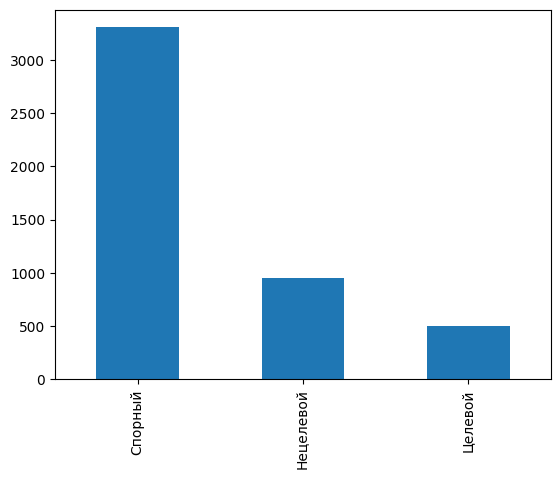

In [ ]:
# Соотношение классов
Headliner_df['Класс'].value_counts().plot.bar()

##### Проект

In [ ]:
Headliner_df.shape

(4759, 74)

In [ ]:
# Добавляем столбец 'Проект'
Headliner_df['Проект'] = 'Headliner'

In [ ]:
Headliner_df.shape

(4759, 75)

#### Первичная предобработка `Headliner_new_df`

##### Дата и время

In [ ]:
Headliner_new_df['Дата и время'].head()

0    2023-08-23 09:11:37
1    2023-08-23 10:08:09
2    2023-08-23 10:39:19
3    2023-08-23 11:38:37
4    2023-08-23 11:40:07
Name: Дата и время, dtype: object

In [ ]:
# Приводим тип данных столбца 'Дата и время'
Headliner_new_df['Дата и время'] = pd.to_datetime(Headliner_new_df['Дата и время'])

In [ ]:
Headliner_new_df['Дата и время'].tail()

1537   2023-10-05 10:20:50
1538   2023-10-05 10:22:18
1539   2023-10-05 10:13:59
1540   2023-10-05 10:24:42
1541   2023-10-05 10:26:28
Name: Дата и время, dtype: datetime64[ns]

##### Идентификатор сессии звонка

In [ ]:
Headliner_new_df['Идентификатор сессии звонка'].head()

0    3128665492
1    3124867081
2    3128534127
3    3126905895
4    3123899209
Name: Идентификатор сессии звонка, dtype: object

In [ ]:
# Приводим тип данных столбца 'Идентификатор сессии звонка'
Headliner_new_df = Headliner_new_df.astype({'Идентификатор сессии звонка': int})

In [ ]:
Headliner_new_df['Идентификатор сессии звонка'].tail()

1537    3277397412
1538    3277402692
1539    3277405642
1540    3277407497
1541    3277416842
Name: Идентификатор сессии звонка, dtype: int64

##### Длительность звонка

In [ ]:
Headliner_new_df['Длительность звонка'].head()

0    00:00:14
1    00:00:45
2    00:00:28
3    00:01:01
4    00:03:24
Name: Длительность звонка, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность звонка'
Headliner_new_df['Длительность звонка'] = pd.to_datetime(Headliner_new_df['Длительность звонка']).dt.time

In [ ]:
# Переводим значение в количество секунд
Headliner_new_df['Длительность звонка'] = Headliner_new_df['Длительность звонка'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Headliner_new_df['Длительность звонка'].tail()

1537    118
1538      6
1539     79
1540     84
1541    132
Name: Длительность звонка, dtype: int64

In [ ]:
# Минимальная длительность звонка
Headliner_new_df['Длительность звонка'].min()

0

In [ ]:
# Максимальная длительность звонка
Headliner_new_df['Длительность звонка'].max()

9646

In [ ]:
# Средняя длительность звонка
Headliner_new_df['Длительность звонка'].mean()

124.42607003891051

##### Длительность ожидания ответа

In [ ]:
Headliner_new_df['Длительность ожидания ответа'].head()

0    00:00:09
1    00:00:09
2    00:00:28
3    00:00:09
4    00:00:09
Name: Длительность ожидания ответа, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность ожидания ответа'
Headliner_new_df['Длительность ожидания ответа'] = pd.to_datetime(Headliner_new_df['Длительность ожидания ответа']).dt.time

In [ ]:
# Переводим значение в количество секунд
Headliner_new_df['Длительность ожидания ответа'] = Headliner_new_df['Длительность ожидания ответа'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Headliner_new_df['Длительность ожидания ответа'].tail()

1537     8
1538     6
1539    76
1540     9
1541     1
Name: Длительность ожидания ответа, dtype: int64

In [ ]:
# Минимальная длительность ожидания ответа
Headliner_new_df['Длительность ожидания ответа'].min()

0

In [ ]:
# Максимальная длительность ожидания ответа
Headliner_new_df['Длительность ожидания ответа'].max()

9646

In [ ]:
# Средняя длительность ожидания ответа
Headliner_new_df['Длительность ожидания ответа'].mean()

30.43450064850843

##### Полная длительность ожидания

In [ ]:
Headliner_new_df['Полная длительность ожидания'].head()

0    00:00:09
1    00:00:09
2    00:00:28
3    00:00:10
4    00:00:09
Name: Полная длительность ожидания, dtype: object

In [ ]:
# Приводим тип данных столбца 'Полная длительность ожидания'
Headliner_new_df['Полная длительность ожидания'] = pd.to_datetime(Headliner_new_df['Полная длительность ожидания']).dt.time

In [ ]:
# Переводим значение в количество секунд
Headliner_new_df['Полная длительность ожидания'] = Headliner_new_df['Полная длительность ожидания'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Headliner_new_df['Полная длительность ожидания'].tail()

1537     8
1538     6
1539    76
1540     9
1541     1
Name: Полная длительность ожидания, dtype: int64

In [ ]:
# Минимальная полная длительность ожидания
Headliner_new_df['Полная длительность ожидания'].min()

0

In [ ]:
# Максимальная полная длительность ожидания
Headliner_new_df['Полная длительность ожидания'].max()

9646

In [ ]:
# Средняя полная длительность ожидания
Headliner_new_df['Полная длительность ожидания'].mean()

31.63099870298314

##### Длительность разговора

In [ ]:
Headliner_new_df['Длительность разговора'].head()

0    00:00:05
1    00:00:36
2    00:00:00
3    00:00:52
4    00:03:15
Name: Длительность разговора, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность разговора'
Headliner_new_df['Длительность разговора'] = pd.to_datetime(Headliner_new_df['Длительность разговора']).dt.time

In [ ]:
# Переводим значение в количество секунд
Headliner_new_df['Длительность разговора'] = Headliner_new_df['Длительность разговора'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Headliner_new_df['Длительность разговора'].tail()

1537    110
1538      0
1539      3
1540     75
1541    131
Name: Длительность разговора, dtype: int64

In [ ]:
# Минимальная длительность разговора
Headliner_new_df['Длительность разговора'].min()

0

In [ ]:
# Максимальная длительность разговора
Headliner_new_df['Длительность разговора'].max()

1670

In [ ]:
# Средняя длительность разговора
Headliner_new_df['Длительность разговора'].mean()

93.99156939040208

##### Длительность постобработки

In [ ]:
Headliner_new_df['Длительность постобработки'].head()

0    00:00:00
1    00:00:00
2    00:00:00
3    00:00:00
4    00:00:00
Name: Длительность постобработки, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность постобработки'
Headliner_new_df['Длительность постобработки'] = pd.to_datetime(Headliner_new_df['Длительность постобработки']).dt.time

In [ ]:
# Переводим значение в количество секунд
Headliner_new_df['Длительность постобработки'] = Headliner_new_df['Длительность постобработки'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Headliner_new_df['Длительность постобработки'].tail()

1537    0
1538    0
1539    0
1540    0
1541    0
Name: Длительность постобработки, dtype: int64

In [ ]:
# Минимальная длительность постобработки
Headliner_new_df['Длительность постобработки'].min()

0

In [ ]:
# Максимальная длительность постобработки
Headliner_new_df['Длительность постобработки'].max()

0

In [ ]:
# Средняя длительность постобработки
Headliner_new_df['Длительность постобработки'].mean()

0.0

##### Чистая длительность разговора

In [ ]:
Headliner_new_df['Чистая длительность разговора'].head()

0    00:00:05
1    00:00:36
2    00:00:00
3    00:00:51
4    00:03:15
Name: Чистая длительность разговора, dtype: object

In [ ]:
# Приводим тип данных столбца 'Чистая длительность разговора'
Headliner_new_df['Чистая длительность разговора'] = pd.to_datetime(Headliner_new_df['Чистая длительность разговора']).dt.time

In [ ]:
# Переводим значение в количество секунд
Headliner_new_df['Чистая длительность разговора'] = Headliner_new_df['Чистая длительность разговора'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Headliner_new_df['Чистая длительность разговора'].tail()

1537    110
1538      0
1539      3
1540     75
1541    131
Name: Чистая длительность разговора, dtype: int64

In [ ]:
# Минимальная чистая длительность разговора
Headliner_new_df['Чистая длительность разговора'].min()

0

In [ ]:
# Максимальная чистая длительность разговора
Headliner_new_df['Чистая длительность разговора'].max()

1084

In [ ]:
# Средняя чистая длительность разговора
Headliner_new_df['Чистая длительность разговора'].mean()

92.79507133592736

##### Номер обращения

In [ ]:
Headliner_new_df['Номер обращения'].head()

0    1
1    2
2    1
3    6
4    8
Name: Номер обращения, dtype: int64

In [ ]:
# Приводим тип данных столбца 'Номер обращения'
Headliner_new_df = Headliner_new_df.astype({'Номер обращения': int})

In [ ]:
Headliner_new_df['Номер обращения'].tail()

1537    4
1538    3
1539    2
1540    5
1541    6
Name: Номер обращения, dtype: int64

##### Файл записи звонка

In [ ]:
Headliner_new_df.shape

(1542, 72)

In [ ]:
# Добавляем столбец 'Файл записи звонка'
Headliner_new_df = Headliner_new_df.merge(Headliner_new_calls_df[['Идентификатор сессии звонка','Файл записи звонка']], how='outer', on=['Идентификатор сессии звонка'])
Headliner_new_df.shape

(1542, 73)

In [ ]:
Headliner_new_df['Файл записи звонка'][~Headliner_new_df['Файл записи звонка'].isnull()].head()

0    Новые записи звонков/Записи Headliner/2023-08-23_09-11-45.552271_from_79166964481_to_74959339929_session_3169726155_talk.mp3
1    Новые записи звонков/Записи Headliner/2023-08-23_10-08-17.665887_from_79166964481_to_74959339929_session_3169874110_talk.mp3
3    Новые записи звонков/Записи Headliner/2023-08-23_11-38-45.818445_from_79166964481_to_74959339929_session_3170175215_talk.mp3
4    Новые записи звонков/Записи Headliner/2023-08-23_11-40-15.759104_from_79858009161_to_74957898990_session_3170179025_talk.mp3
5        Новые записи звонков/Записи Headliner/2023-08-23_11-41-28.642199_from_79123988128_to_0188880_session_3170187115_talk.mp3
Name: Файл записи звонка, dtype: object

In [ ]:
Headliner_new_df['Файл записи звонка'].count()

1226

##### Теги

In [ ]:
# Доля непустых записей
print(Headliner_new_df['Теги'].count())
print(Headliner_new_df.shape[0])

1535
1542


In [ ]:
# Количество уникальных тегов
Headliner_new_df['Теги'].nunique()

268

In [ ]:
# Количество уникальных тегов целевых звонков
Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()][Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].str.contains('Первичный целевой')].nunique()

82

In [ ]:
# Количество уникальных тегов нецелевых звонков
Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()][~Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].str.contains('Первичный целевой')].nunique()

186

In [ ]:
# Теги целевых звонков
Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()][Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].str.contains('Первичный целевой')].unique()

array(['Лид - Первичный целевой - 2 очередь - 3 очередь - 2-ком',
       'Первичный целевой - 2 очередь - ипотека - 3 очередь - 1-ком',
       'Первичный целевой - 3 очередь - 3-ком',
       'Первичный целевой - запись на просмотр - 3 очередь - 3-ком',
       'Лид - Первичный целевой - 2 очередь - 4-ком',
       'Первичный целевой - ипотека - 3 очередь - 2-ком',
       'Повторное более 3 месяцев целевой - Первичный целевой - 2 очередь - 3 очередь - 1-ком',
       'Первичный целевой - 2 очередь - 3-ком',
       'Первичный целевой - запись на просмотр - не определился',
       'ПБ - Первичный целевой',
       'Первичный целевой - 2 очередь - 3 очередь - 1-ком',
       'Первичный целевой - 2 очередь - 3 очередь - 2-ком',
       'Первичный целевой - 2 очередь - 1-2 ком',
       'Первичный целевой - интересует рассрочка - 3 очередь - 2-ком',
       'Первичный целевой - 2 очередь - 2-ком',
       'ПБ - Первичный целевой - студия - 3 очередь',
       'Первичный целевой - ипотека - студия - 3 

In [ ]:
# Теги нецелевых звонков
Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()][~Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].str.contains('Первичный целевой')].unique()

array(['спорный - нет соединения',
       'Вторичный целевой - 2 очередь - интересует трейд-ин',
       'Лид - спорный - номер взят не дозвонились  до ОП - 1-ком',
       'спорный - связь прервалась',
       'студия - Условно целевой - отправить на WhatsApp',
       'постпродажное обслуживание - Вторичный целевой',
       'ипотека - не проходит по бюджету - студия - 3 очередь - Условно целевой',
       'спорный - номер взят не дозвонились  до ОП',
       'спорный - поиск офиса продаж', 'Нецелевой звонок - ошибка',
       'Лид - спорный - связь прервалась - 1-ком',
       'повторная покупка - Вторичный целевой - 2 очередь - 2-ком - 1-ком',
       'постпродажное обслуживание - Вторичный целевой - негатив',
       'не устраивает планировка - 2-ком - Условно целевой',
       'Вторичный целевой - студия - 3 очередь',
       'спорный - клиент просил перезвонить',
       'спорный - 1-2 ком - 3 очередь - связь прервалась на ОП',
       'Коммерческая недвижимость - Условно целевой',
       'спо

In [ ]:
# Количество уникальных тегов спорных звонков
Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()][Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].str.contains('спорный')].nunique()

65

In [ ]:
# Теги спорных звонков
Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()][Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].str.contains('спорный')].unique()

array(['спорный - нет соединения',
       'Лид - спорный - номер взят не дозвонились  до ОП - 1-ком',
       'спорный - связь прервалась',
       'спорный - номер взят не дозвонились  до ОП',
       'спорный - поиск офиса продаж',
       'Лид - спорный - связь прервалась - 1-ком',
       'спорный - клиент просил перезвонить',
       'спорный - 1-2 ком - 3 очередь - связь прервалась на ОП',
       'спорный - сотрудничество',
       'спорный - номер взят не дозвонились  до ОП - Машиноместо',
       'спорный - связь прервалась на ОП',
       'Лид - спорный - связь прервалась - 3-ком',
       'спорный - менеджер сам перезвонит - 1-ком',
       'спорный - номер взят не дозвонились  до ОП - 3-ком',
       'спорный - номер взят не дозвонились  до ОП - кладовка',
       'спорный - Коммерческая недвижимость - менеджер сам перезвонит',
       'спорный - номер взят не дозвонились  до ОП - 1-2 ком',
       'спорный - связь прервалась - 3-ком',
       'спорный - номер взят не дозвонились  до ОП - 2

##### Класс

In [ ]:
Headliner_new_df.shape

(1542, 73)

In [ ]:
# Добавляем столбец 'Класс'
Headliner_new_df['Класс'] = 'Неопределено'

In [ ]:
# Список тегов целевых звонков
target_teg_list = []
pattern = '.*первичный целевой.*'
for teg in Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].unique():
  if re.findall(pattern.lower(), teg.lower()):
    target_teg_list.append(teg)

In [ ]:
# Размечаем целевые звонки
Headliner_new_df.loc[Headliner_new_df['Теги'].isin(target_teg_list), 'Класс'] = 'Целевой'

In [ ]:
# Список тегов нецелевых звонков
not_target_teg_list = []
pattern = '.*первичный целевой.*'
for teg in Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].unique():
  if not re.findall(pattern.lower(), teg.lower()):
    not_target_teg_list.append(teg)

In [ ]:
# Размечаем нецелевые звонки
Headliner_new_df.loc[Headliner_new_df['Теги'].isin(not_target_teg_list), 'Класс'] = 'Нецелевой'

In [ ]:
# Список тегов спорных звонков
moot_teg_list = []
pattern = '.*спорный.*'
for teg in Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].unique():
  if re.findall(pattern.lower(), teg.lower()):
    moot_teg_list.append(teg)

In [ ]:
# Размечаем спорные звонки
Headliner_new_df.loc[Headliner_new_df['Теги'].isin(moot_teg_list), 'Класс'] = 'Спорный'

In [ ]:
# Соотношение классов
print(Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Целевой'].count())
print(Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Спорный'].count())
print(Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Нецелевой'].count())
print(Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Неопределено'].count())
print('----')
print(Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Целевой'].count()   +
      Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Спорный'].count()   +
      Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Нецелевой'].count() +
      Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Неопределено'].count())

194
951
390
7
----
1542


<Axes: >

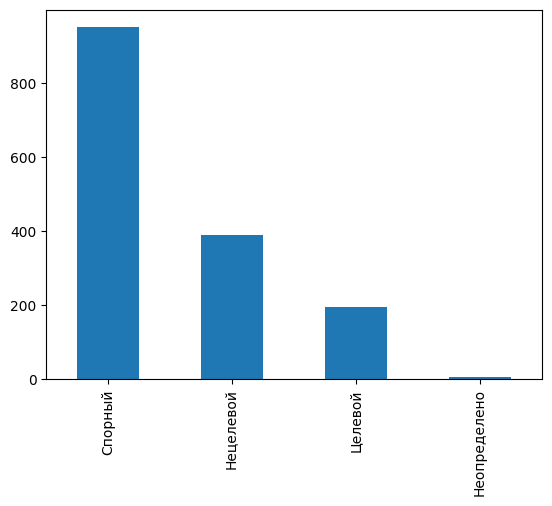

In [ ]:
# Соотношение классов
Headliner_new_df['Класс'].value_counts().plot.bar()

##### Проект

In [ ]:
Headliner_new_df.shape

(1542, 74)

In [ ]:
# Добавляем столбец 'Проект'
Headliner_new_df['Проект'] = 'Headliner'

In [ ]:
Headliner_new_df.shape

(1542, 75)

#### Анализ и сравнение датафреймов

In [ ]:
# Размеры
print(Headliner_df.shape)
print(Headliner_new_df.shape)
print()
print(Headliner_calls_df.shape)
print(Headliner_new_calls_df.shape)

(4759, 75)
(1542, 75)

(2045, 5)
(1226, 5)


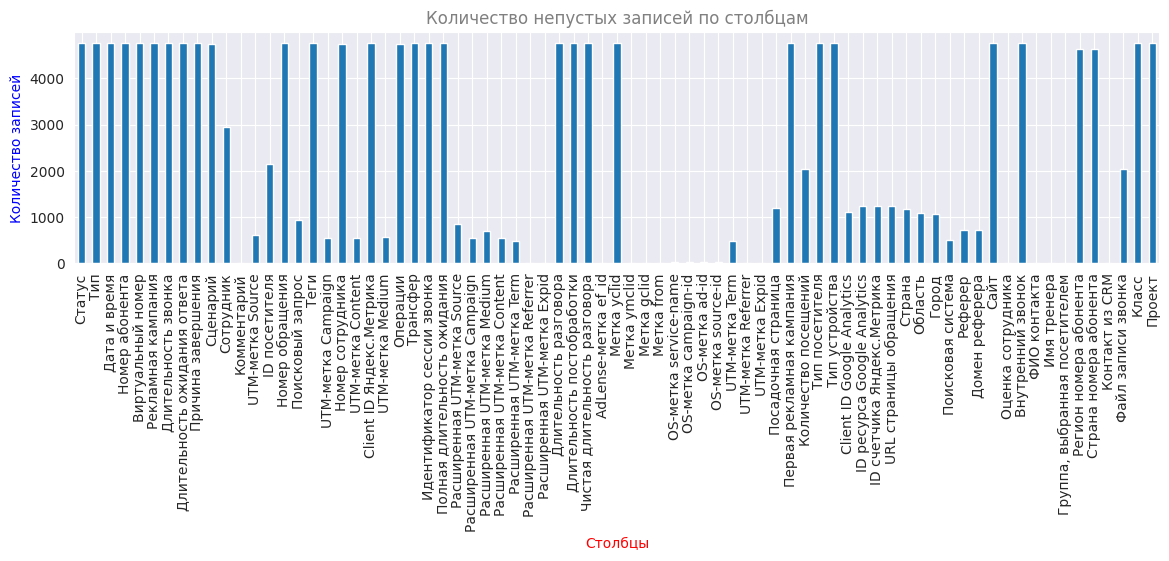

In [ ]:
# @title График Data.count
Data = Headliner_df # @param {type:"raw"}
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(14,3))
counts = Data.count()
ax = counts.plot.bar()
ax.set_xlabel('Столбцы', c='r')
ax.set_ylabel('Количество записей', c='b')
ax.set_title('Количество непустых записей по столбцам', c='gray')

plt.show()

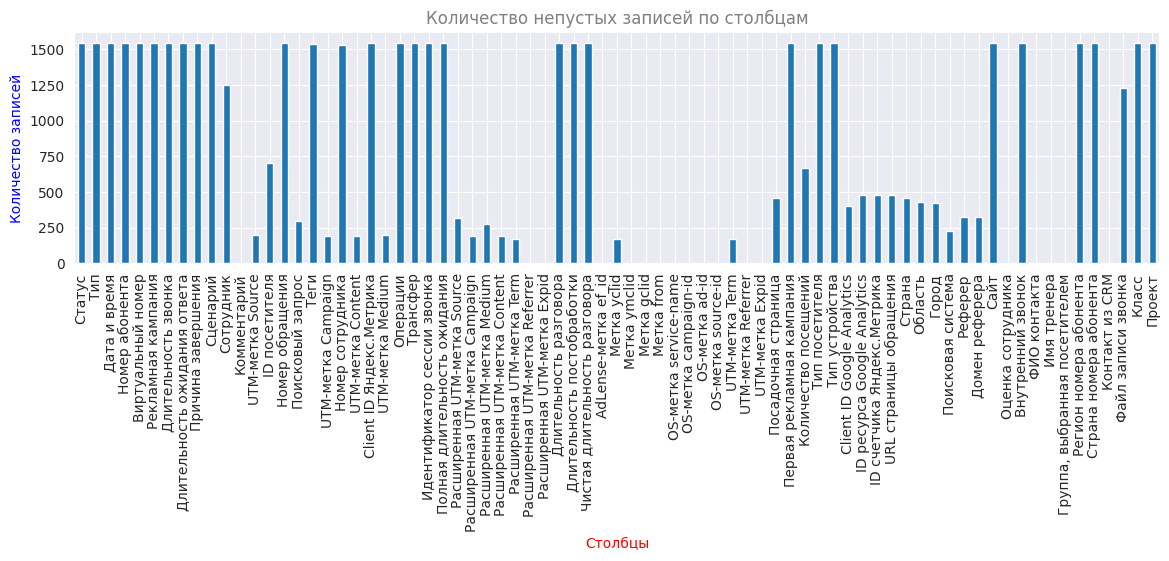

In [ ]:
# @title График Data.count
Data = Headliner_new_df # @param {type:"raw"}
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(14,3))
counts = Data.count()
ax = counts.plot.bar()
ax.set_xlabel('Столбцы', c='r')
ax.set_ylabel('Количество записей', c='b')
ax.set_title('Количество непустых записей по столбцам', c='gray')

plt.show()

#### Сохранение датафреймов

In [ ]:
# Сортируем по столбцу 'Идентификатор сессии звонка'
Headliner_df = Headliner_df.sort_values('Идентификатор сессии звонка')
Headliner_new_df = Headliner_new_df.sort_values('Идентификатор сессии звонка')
Headliner_df.index = range(Headliner_df.shape[0])
Headliner_new_df.index = range(Headliner_new_df.shape[0])

In [ ]:
# Сохраняем Headliner_df в pkl
with open(df_path + 'Headliner_df.pkl', 'wb') as f:
  pkl.dump(Headliner_df, f)

# Сохраняем Headliner_new_df в pkl
with open(df_path + 'Headliner_new_df.pkl', 'wb') as f:
  pkl.dump(Headliner_new_df, f)

### Primavera

#### Загрузка датафреймов

In [4]:
# Загружаем Primavera_df из pkl
with open(df_path + 'Primavera_df.pkl', 'rb') as f:
  Primavera_df = pkl.load(f)

# Загружаем Primavera_new_df из pkl
with open(df_path + 'Primavera_new_df.pkl', 'rb') as f:
  Primavera_new_df = pkl.load(f)

In [5]:
# Загружаем Primavera_calls_df из pkl
with open(df_path + 'Primavera_calls_df.pkl', 'rb') as f:
  Primavera_calls_df = pkl.load(f)

# Загружаем Primavera_new_calls_df из pkl
with open(df_path + 'Primavera_new_calls_df.pkl', 'rb') as f:
  Primavera_new_calls_df = pkl.load(f)

#### Первичная предобработка `Primavera_df`

##### Дата и время

In [ ]:
Primavera_df['Дата и время'].head()

0    2023-07-31 20:01:25
1    2023-07-31 19:30:00
2    2023-07-31 19:29:51
3    2023-07-31 19:20:01
4    2023-07-31 19:04:58
Name: Дата и время, dtype: object

In [ ]:
# Приводим тип данных столбца 'Дата и время'
Primavera_df['Дата и время'] = pd.to_datetime(Primavera_df['Дата и время'])

In [ ]:
Primavera_df['Дата и время'].tail()

3501   2023-05-04 16:57:14
3502   2023-05-02 13:25:21
3503   2023-05-02 10:54:09
3504   2023-05-02 10:38:48
3505   2023-05-02 10:33:29
Name: Дата и время, dtype: datetime64[ns]

##### Идентификатор сессии звонка

In [ ]:
Primavera_df['Идентификатор сессии звонка'].head()

0    3128610272
1    3124137714
2    3124136879
3    3128578812
4    3128558172
Name: Идентификатор сессии звонка, dtype: object

In [ ]:
# Приводим тип данных столбца 'Идентификатор сессии звонка'
Primavera_df = Primavera_df.astype({'Идентификатор сессии звонка': int})

In [ ]:
Primavera_df['Идентификатор сессии звонка'].tail()

3501    2931643480
3502    2917601233
3503    2924662976
3504    2924590524
3505    2924569648
Name: Идентификатор сессии звонка, dtype: int64

##### Длительность звонка

In [ ]:
Primavera_df['Длительность звонка'].head()

0    00:33:32
1    00:00:58
2    00:01:53
3    00:00:03
4    00:00:02
Name: Длительность звонка, dtype: object

In [ ]:
# Меняем '-1д 23:59:59' на '23:59:59' в столбце 'Длительность звонка'
Primavera_df['Длительность звонка'] = Primavera_df['Длительность звонка'].apply(lambda x: '23:59:59' if x == '-1д 23:59:59' else x)

In [ ]:
# Приводим тип данных столбца 'Длительность звонка'
Primavera_df['Длительность звонка'] = pd.to_datetime(Primavera_df['Длительность звонка']).dt.time

In [ ]:
# Переводим значение в количество секунд
Primavera_df['Длительность звонка'] = Primavera_df['Длительность звонка'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Primavera_df['Длительность звонка'].tail()

3501    87
3502    46
3503    19
3504    19
3505    18
Name: Длительность звонка, dtype: int64

In [ ]:
# Минимальная длительность звонка
Primavera_df['Длительность звонка'].min()

0

In [ ]:
# Максимальная длительность звонка
Primavera_df['Длительность звонка'].max()

86399

In [ ]:
# Средняя длительность звонка
Primavera_df['Длительность звонка'].mean()

193.15116942384483

##### Длительность ожидания ответа

In [ ]:
Primavera_df['Длительность ожидания ответа'].head()

0    00:00:30
1    00:00:08
2    00:00:27
3    00:00:03
4    00:00:02
Name: Длительность ожидания ответа, dtype: object

In [ ]:
# Меняем '-1д 23:59:59' на '23:59:59' в столбце 'Длительность ожидания ответа'
Primavera_df['Длительность ожидания ответа'] = Primavera_df['Длительность ожидания ответа'].apply(lambda x: '23:59:59' if x == '-1д 23:59:59' else x)

In [ ]:
# Приводим тип данных столбца 'Длительность ожидания ответа'
Primavera_df['Длительность ожидания ответа'] = pd.to_datetime(Primavera_df['Длительность ожидания ответа']).dt.time

In [ ]:
# Переводим значение в количество секунд
Primavera_df['Длительность ожидания ответа'] = Primavera_df['Длительность ожидания ответа'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Primavera_df['Длительность ожидания ответа'].tail()

3501     6
3502     6
3503    19
3504    19
3505    18
Name: Длительность ожидания ответа, dtype: int64

In [ ]:
# Минимальная длительность ожидания ответа
Primavera_df['Длительность ожидания ответа'].min()

0

In [ ]:
# Максимальная длительность ожидания ответа
Primavera_df['Длительность ожидания ответа'].max()

86399

In [ ]:
# Средняя длительность ожидания ответа
Primavera_df['Длительность ожидания ответа'].mean()

62.757843696520254

##### Полная длительность ожидания

In [ ]:
Primavera_df['Полная длительность ожидания'].head()

0    00:00:31
1    00:00:08
2    00:00:27
3    00:00:03
4    00:00:02
Name: Полная длительность ожидания, dtype: object

In [ ]:
# Меняем '-1д 23:59:59' на '23:59:59' в столбце 'Полная длительность ожидания'
Primavera_df['Полная длительность ожидания'] = Primavera_df['Полная длительность ожидания'].apply(lambda x: '23:59:59' if x == '-1д 23:59:59' else x)

In [ ]:
# Приводим тип данных столбца 'Полная длительность ожидания'
Primavera_df['Полная длительность ожидания'] = pd.to_datetime(Primavera_df['Полная длительность ожидания']).dt.time

In [ ]:
# Переводим значение в количество секунд
Primavera_df['Полная длительность ожидания'] = Primavera_df['Полная длительность ожидания'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Primavera_df['Полная длительность ожидания'].tail()

3501     6
3502     6
3503    19
3504    19
3505    18
Name: Полная длительность ожидания, dtype: int64

In [ ]:
# Минимальная полная длительность ожидания
Primavera_df['Полная длительность ожидания'].min()

0

In [ ]:
# Максимальная полная длительность ожидания
Primavera_df['Полная длительность ожидания'].max()

86399

In [ ]:
# Средняя полная длительность ожидания
Primavera_df['Полная длительность ожидания'].mean()

62.86594409583571

##### Длительность разговора

In [ ]:
Primavera_df['Длительность разговора'].head()

0    00:33:02
1    00:00:50
2    00:01:26
3    00:00:00
4    00:00:00
Name: Длительность разговора, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность разговора'
Primavera_df['Длительность разговора'] = pd.to_datetime(Primavera_df['Длительность разговора']).dt.time

In [ ]:
# Переводим значение в количество секунд
Primavera_df['Длительность разговора'] = Primavera_df['Длительность разговора'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Primavera_df['Длительность разговора'].tail()

3501    81
3502    40
3503     0
3504     0
3505     0
Name: Длительность разговора, dtype: int64

In [ ]:
# Минимальная длительность разговора
Primavera_df['Длительность разговора'].min()

0

In [ ]:
# Максимальная длительность разговора
Primavera_df['Длительность разговора'].max()

3591

In [ ]:
# Средняя длительность разговора
Primavera_df['Длительность разговора'].mean()

130.3933257273246

##### Длительность постобработки

In [ ]:
Primavera_df['Длительность постобработки'].head()

0    00:00:00
1    00:00:00
2    00:00:00
3    00:00:00
4    00:00:00
Name: Длительность постобработки, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность постобработки'
Primavera_df['Длительность постобработки'] = pd.to_datetime(Primavera_df['Длительность постобработки']).dt.time

In [ ]:
# Переводим значение в количество секунд
Primavera_df['Длительность постобработки'] = Primavera_df['Длительность постобработки'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Primavera_df['Длительность постобработки'].tail()

3501    0
3502    0
3503    0
3504    0
3505    0
Name: Длительность постобработки, dtype: int64

In [ ]:
# Минимальная длительность постобработки
Primavera_df['Длительность постобработки'].min()

0

In [ ]:
# Максимальная длительность постобработки
Primavera_df['Длительность постобработки'].max()

0

In [ ]:
# Средняя длительность постобработки
Primavera_df['Длительность постобработки'].mean()

0.0

##### Чистая длительность разговора

In [ ]:
Primavera_df['Чистая длительность разговора'].head()

0    00:33:01
1    00:00:50
2    00:01:26
3    00:00:00
4    00:00:00
Name: Чистая длительность разговора, dtype: object

In [ ]:
# Приводим тип данных столбца 'Чистая длительность разговора'
Primavera_df['Чистая длительность разговора'] = pd.to_datetime(Primavera_df['Чистая длительность разговора']).dt.time

In [ ]:
# Переводим значение в количество секунд
Primavera_df['Чистая длительность разговора'] = Primavera_df['Чистая длительность разговора'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Primavera_df['Чистая длительность разговора'].tail()

3501    81
3502    40
3503     0
3504     0
3505     0
Name: Чистая длительность разговора, dtype: int64

In [ ]:
# Минимальная чистая длительность разговора
Primavera_df['Чистая длительность разговора'].min()

0

In [ ]:
# Максимальная чистая длительность разговора
Primavera_df['Чистая длительность разговора'].max()

3591

In [ ]:
# Средняя чистая длительность разговора
Primavera_df['Чистая длительность разговора'].mean()

130.28522532800912

##### Номер обращения

In [ ]:
Primavera_df['Номер обращения'].head()

0       1
1       1
2       1
3    1140
4    1139
Name: Номер обращения, dtype: object

In [ ]:
# Приводим тип данных столбца 'Номер обращения'
Primavera_df = Primavera_df.astype({'Номер обращения': int})

In [ ]:
Primavera_df['Номер обращения'].tail()

3501     43
3502    216
3503     15
3504     14
3505     13
Name: Номер обращения, dtype: int64

##### Файл записи звонка

In [ ]:
Primavera_df.shape

(3506, 74)

In [ ]:
# Добавляем столбец 'Файл записи звонка'
Primavera_df = Primavera_df.merge(Primavera_calls_df[['Идентификатор сессии звонка','Файл записи звонка']], how='outer', on=['Идентификатор сессии звонка'])
Primavera_df.shape

(3972, 75)

In [ ]:
Primavera_df['Файл записи звонка'][~Primavera_df['Файл записи звонка'].isnull()].head()

614    Записи звонков/Записи звонков_primavera/2023-07-16_19-33-07.854622_from_79254254955_to_0111642_session_3091299879_talk.mp3
620    Записи звонков/Записи звонков_primavera/2023-07-16_18-58-00.373491_from_79066744592_to_0253195_session_3091171318_talk.mp3
623    Записи звонков/Записи звонков_primavera/2023-07-16_18-18-16.556607_from_79603581162_to_0253211_session_3093871612_talk.mp3
625    Записи звонков/Записи звонков_primavera/2023-07-16_17-24-33.470211_from_79053937606_to_0253208_session_3091052233_talk.mp3
626    Записи звонков/Записи звонков_primavera/2023-07-16_16-30-58.287203_from_79857650508_to_0253211_session_3091065119_talk.mp3
Name: Файл записи звонка, dtype: object

In [ ]:
Primavera_df['Файл записи звонка'].count()

1983

In [ ]:
# Заполняем пустые значения в столбце 'Дата и время'
for item_value, id in Primavera_calls_df.loc[Primavera_calls_df['Идентификатор сессии звонка'].isin(Primavera_df['Идентификатор сессии звонка'][Primavera_df['Дата и время'].isnull()]),
                                             ('Дата и время', 'Идентификатор сессии звонка')].values:
  Primavera_df.loc[Primavera_df[Primavera_df['Идентификатор сессии звонка'] == id].index, 'Дата и время'] = item_value

In [ ]:
# Заполняем пустые значения в столбце 'Номер абонента'
for item_value, id in Primavera_calls_df.loc[Primavera_calls_df['Идентификатор сессии звонка'].isin(Primavera_df['Идентификатор сессии звонка'][Primavera_df['Номер абонента'].isnull()]),
                                             ('Номер абонента', 'Идентификатор сессии звонка')].values:
  Primavera_df.loc[Primavera_df[Primavera_df['Идентификатор сессии звонка'] == id].index, 'Номер абонента'] = str(item_value)

In [ ]:
# Заполняем пустые значения в столбце 'Номер сотрудника'
for item_value, id in Primavera_calls_df.loc[Primavera_calls_df['Идентификатор сессии звонка'].isin(Primavera_df['Идентификатор сессии звонка'][Primavera_df['Номер сотрудника'].isnull()]),
                                             ('Номер сотрудника', 'Идентификатор сессии звонка')].values:
  Primavera_df.loc[Primavera_df[Primavera_df['Идентификатор сессии звонка'] == id].index, 'Номер сотрудника'] = str(item_value)

##### Теги

In [ ]:
# Доля непустых записей
print(Primavera_df['Теги'].count())
print(Primavera_df.shape[0])

3506
3972


In [ ]:
# Количество уникальных тегов
Primavera_df['Теги'].nunique()

50

In [ ]:
# Количество уникальных тегов целевых звонков
Primavera_df['Теги'][~Primavera_df['Теги'].isnull()][Primavera_df['Теги'][~Primavera_df['Теги'].isnull()].str.contains('Целевой_М108')].nunique()

27

In [ ]:
# Количество уникальных тегов нецелевых звонков
Primavera_df['Теги'][~Primavera_df['Теги'].isnull()][~Primavera_df['Теги'][~Primavera_df['Теги'].isnull()].str.contains('Целевой_М108')].nunique()

23

In [ ]:
# Теги целевых звонков
Primavera_df['Теги'][~Primavera_df['Теги'].isnull()][Primavera_df['Теги'][~Primavera_df['Теги'].isnull()].str.contains('Целевой_М108')].unique()

array(['Целевой_М108', 'Не обработано - Целевой_М108 - Нецелевой контакт',
       'Целевой_М108 - Встреча', 'Целевой_М108 - Нецелевой контакт',
       'Целевой_М108 - ПБ - Встреча',
       'Не обработано - Целевой_М108 - Встреча - Нецелевой контакт',
       'Целевой_М108 - ПБ - Встреча - ДДУ',
       'Целевой_М108 - Обработано - Нецелевой контакт',
       'Целевой_М108 - Повтор_М108',
       'Не обработано - Целевой_М108 - ПБ - Встреча - ДДУ - Нецелевой контакт',
       'Целевой_М108 - ПБ',
       'Не обработано - Целевой_М108 - ПБ - Нецелевой контакт',
       'Целевой_М108 - по критериям площадки',
       'Целевой_М108 - Обработано - Встреча - ДДУ - Нецелевой контакт',
       'Целевой_М108 - Обработано - Встреча - Нецелевой контакт',
       'Целевой_М108 - Повтор_М108 - по критериям площадки',
       'Не обработано - Целевой_М108 - ПБ - ДДУ - Нецелевой контакт',
       'Целевой_М108 - Встреча - ДДУ', 'Целевой_М108 - ДДУ',
       'Целевой_М108 - ПБ - ДДУ', 'Целевой_М108 - Нецелевой кон

In [ ]:
# Теги нецелевых звонков
Primavera_df['Теги'][~Primavera_df['Теги'].isnull()][~Primavera_df['Теги'][~Primavera_df['Теги'].isnull()].str.contains('Целевой_М108')].unique()

array(['Нецелевой контакт_М108',
       'Не обработано - Нецелевой контакт - Повтор_М108',
       'Не обработано - Нецелевой контакт - Нецелевой контакт_М108',
       'Нецелевой контакт - Повтор_М108', 'Повтор_М108',
       'Обработано - Нецелевой контакт - Повтор_М108',
       'Нецелевой контакт - Нецелевой контакт_М108', 'Встреча',
       'Обработано - Нецелевой контакт - Нецелевой контакт_М108',
       'Повтор_М108 - Нецелевой контакт_М108', 'Спам - Нецелевой контакт',
       'В обработке - Нецелевой контакт - Нецелевой контакт_М108',
       'Не обработано - Нецелевой контакт_М108',
       'Не обработано - Запросить статус_М108 - Нецелевой контакт - Нецелевой контакт_М108',
       'Не обработано - Повторный контакт - Нецелевой контакт_М108',
       'Спам - Нецелевой контакт - Повтор_М108',
       'Не обработано - Спам - Нецелевой контакт - Повтор_М108',
       'Спам - Нецелевой контакт - Нецелевой контакт_М108',
       'Не обработано - Спам - Нецелевой контакт - Нецелевой контакт_М1

##### Класс

In [ ]:
Primavera_df.shape

(3972, 75)

In [ ]:
# Добавляем столбец 'Класс'
Primavera_df['Класс'] = 'Неопределено'

In [ ]:
# Список тегов целевых звонков
target_teg_list = []
pattern = '.*Целевой_М108.*'
for teg in Primavera_df['Теги'][~Primavera_df['Теги'].isnull()].unique():
  if re.findall(pattern.lower(), teg.lower()):
    target_teg_list.append(teg)

In [ ]:
# Размечаем целевые звонки
Primavera_df.loc[Primavera_df['Теги'].isin(target_teg_list), 'Класс'] = 'Целевой'

In [ ]:
# Список тегов нецелевых звонков
not_target_teg_list = []
pattern = '.*Целевой_М108.*'
for teg in Primavera_df['Теги'][~Primavera_df['Теги'].isnull()].unique():
  if not re.findall(pattern.lower(), teg.lower()):
    not_target_teg_list.append(teg)

In [ ]:
# Размечаем нецелевые звонки
Primavera_df.loc[Primavera_df['Теги'].isin(not_target_teg_list), 'Класс'] = 'Нецелевой'

In [6]:
# Соотношение классов
print(Primavera_df['Класс'][Primavera_df['Класс'] == 'Целевой'].count())
print(Primavera_df['Класс'][Primavera_df['Класс'] == 'Нецелевой'].count())
print(Primavera_df['Класс'][Primavera_df['Класс'] == 'Неопределено'].count())
print('----')
print(Primavera_df['Класс'][Primavera_df['Класс'] == 'Целевой'].count()   +
      Primavera_df['Класс'][Primavera_df['Класс'] == 'Нецелевой'].count() +
      Primavera_df['Класс'][Primavera_df['Класс'] == 'Неопределено'].count())

917
2589
466
----
3972


<Axes: >

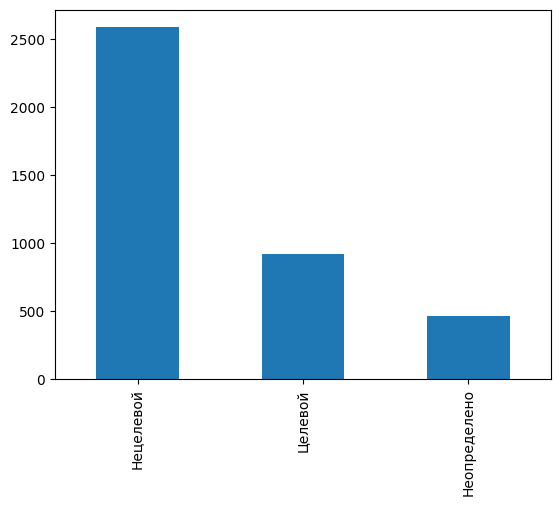

In [7]:
# Соотношение классов
Primavera_df['Класс'].value_counts().plot.bar()

##### Проект

In [ ]:
Primavera_df.shape

(3972, 76)

In [ ]:
# Добавляем столбец 'Проект'
Primavera_df['Проект'] = 'Primavera'

In [ ]:
Primavera_df.shape

(3972, 77)

#### Первичная предобработка `Primavera_new_df`

##### Дата и время

In [ ]:
Primavera_new_df['Дата и время'].head()

0    2023-10-04 19:47:03
1    2023-10-04 19:40:04
2    2023-10-04 18:13:43
3    2023-10-04 18:11:55
4    2023-10-04 17:56:51
Name: Дата и время, dtype: object

In [ ]:
# Приводим тип данных столбца 'Дата и время'
Primavera_new_df['Дата и время'] = pd.to_datetime(Primavera_new_df['Дата и время'])

In [ ]:
Primavera_new_df['Дата и время'].tail()

1518   2023-09-01 12:05:19
1519   2023-09-01 11:41:53
1520   2023-09-01 11:16:24
1521   2023-09-01 09:25:53
1522   2023-09-01 09:00:12
Name: Дата и время, dtype: datetime64[ns]

##### Идентификатор сессии звонка

In [ ]:
Primavera_new_df['Идентификатор сессии звонка'].head()

0    3264304568
1    3276780397
2    3269705084
3    3276629522
4    3276598592
Name: Идентификатор сессии звонка, dtype: int64

In [ ]:
# Приводим тип данных столбца 'Идентификатор сессии звонка'
Primavera_new_df = Primavera_new_df.astype({'Идентификатор сессии звонка': int})

In [ ]:
Primavera_new_df['Идентификатор сессии звонка'].tail()

1518    3188422720
1519    3188347120
1520    3195799881
1521    3187995780
1522    3200997782
Name: Идентификатор сессии звонка, dtype: int64

##### Длительность звонка

In [ ]:
Primavera_new_df['Длительность звонка'].head()

0    00:05:24
1    00:00:34
2    00:01:57
3    00:00:03
4    00:00:03
Name: Длительность звонка, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность звонка'
Primavera_new_df['Длительность звонка'] = pd.to_datetime(Primavera_new_df['Длительность звонка']).dt.time

In [ ]:
# Переводим значение в количество секунд
Primavera_new_df['Длительность звонка'] = Primavera_new_df['Длительность звонка'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Primavera_new_df['Длительность звонка'].tail()

1518     22
1519    122
1520    319
1521    427
1522     46
Name: Длительность звонка, dtype: int64

In [ ]:
# Минимальная длительность звонка
Primavera_new_df['Длительность звонка'].min()

0

In [ ]:
# Максимальная длительность звонка
Primavera_new_df['Длительность звонка'].max()

1914

In [ ]:
# Средняя длительность звонка
Primavera_new_df['Длительность звонка'].mean()

127.5666447800394

##### Полная длительность ожидания

In [ ]:
Primavera_new_df['Полная длительность ожидания'].head()

0    00:00:04
1    00:00:22
2    00:00:04
3    00:00:03
4    00:00:03
Name: Полная длительность ожидания, dtype: object

In [ ]:
# Приводим тип данных столбца 'Полная длительность ожидания'
Primavera_new_df['Полная длительность ожидания'] = pd.to_datetime(Primavera_new_df['Полная длительность ожидания']).dt.time

In [ ]:
# Переводим значение в количество секунд
Primavera_new_df['Полная длительность ожидания'] = Primavera_new_df['Полная длительность ожидания'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Primavera_new_df['Полная длительность ожидания'].tail()

1518     8
1519    28
1520     4
1521     4
1522    29
Name: Полная длительность ожидания, dtype: int64

In [ ]:
# Минимальная полная длительность ожидания
Primavera_new_df['Полная длительность ожидания'].min()

0

In [ ]:
# Максимальная полная длительность ожидания
Primavera_new_df['Полная длительность ожидания'].max()

1022

In [ ]:
# Средняя полная длительность ожидания
Primavera_new_df['Полная длительность ожидания'].mean()

19.96323046618516

##### Длительность разговора

In [ ]:
Primavera_new_df['Длительность разговора'].head()

0    00:05:20
1    00:00:13
2    00:01:53
3    00:00:00
4    00:00:00
Name: Длительность разговора, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность разговора'
Primavera_new_df['Длительность разговора'] = pd.to_datetime(Primavera_new_df['Длительность разговора']).dt.time

In [ ]:
# Переводим значение в количество секунд
Primavera_new_df['Длительность разговора'] = Primavera_new_df['Длительность разговора'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Primavera_new_df['Длительность разговора'].tail()

1518     14
1519     94
1520    315
1521    423
1522     18
Name: Длительность разговора, dtype: int64

In [ ]:
# Минимальная длительность разговора
Primavera_new_df['Длительность разговора'].min()

0

In [ ]:
# Максимальная длительность разговора
Primavera_new_df['Длительность разговора'].max()

1896

In [ ]:
# Средняя длительность разговора
Primavera_new_df['Длительность разговора'].mean()

107.6913985554826

##### Длительность постобработки

In [ ]:
Primavera_new_df['Длительность постобработки'].head()

0    00:00:00
1    00:00:00
2    00:00:00
3    00:00:00
4    00:00:00
Name: Длительность постобработки, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность постобработки'
Primavera_new_df['Длительность постобработки'] = pd.to_datetime(Primavera_new_df['Длительность постобработки']).dt.time

In [ ]:
# Переводим значение в количество секунд
Primavera_new_df['Длительность постобработки'] = Primavera_new_df['Длительность постобработки'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Primavera_new_df['Длительность постобработки'].tail()

1518    0
1519    0
1520    0
1521    0
1522    0
Name: Длительность постобработки, dtype: int64

In [ ]:
# Минимальная длительность постобработки
Primavera_new_df['Длительность постобработки'].min()

0

In [ ]:
# Максимальная длительность постобработки
Primavera_new_df['Длительность постобработки'].max()

0

In [ ]:
# Средняя длительность постобработки
Primavera_new_df['Длительность постобработки'].mean()

0.0

##### Чистая длительность разговора

In [ ]:
Primavera_new_df['Чистая длительность разговора'].head()

0    00:05:20
1    00:00:12
2    00:01:53
3    00:00:00
4    00:00:00
Name: Чистая длительность разговора, dtype: object

In [ ]:
# Приводим тип данных столбца 'Чистая длительность разговора'
Primavera_new_df['Чистая длительность разговора'] = pd.to_datetime(Primavera_new_df['Чистая длительность разговора']).dt.time

In [ ]:
# Переводим значение в количество секунд
Primavera_new_df['Чистая длительность разговора'] = Primavera_new_df['Чистая длительность разговора'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Primavera_new_df['Чистая длительность разговора'].tail()

1518     14
1519     94
1520    315
1521    423
1522     17
Name: Чистая длительность разговора, dtype: int64

In [ ]:
# Минимальная чистая длительность разговора
Primavera_new_df['Чистая длительность разговора'].min()

0

In [ ]:
# Максимальная чистая длительность разговора
Primavera_new_df['Чистая длительность разговора'].max()

1886

In [ ]:
# Средняя чистая длительность разговора
Primavera_new_df['Чистая длительность разговора'].mean()

107.60341431385423

##### Номер обращения

In [ ]:
Primavera_new_df['Номер обращения'].head()

0       1
1    4346
2      15
3       6
4       5
Name: Номер обращения, dtype: int64

In [ ]:
Primavera_new_df['Номер обращения'].tail()

1518     1
1519     1
1520     2
1521     1
1522    88
Name: Номер обращения, dtype: int64

##### Файл записи звонка

In [ ]:
Primavera_new_df.shape

(1523, 71)

In [ ]:
# Добавляем столбец 'Файл записи звонка'
Primavera_new_df = Primavera_new_df.merge(Primavera_new_calls_df[['Идентификатор сессии звонка','Файл записи звонка']], how='outer', on=['Идентификатор сессии звонка'])
Primavera_new_df.shape

(1523, 72)

In [ ]:
Primavera_new_df['Файл записи звонка'][~Primavera_new_df['Файл записи звонка'].isnull()].head()

0    Новые записи звонков/Записи Primavera/2023-10-04_19-47-06.171534_from_79624005760_to_0111652_session_3264304568_talk.mp3
1    Новые записи звонков/Записи Primavera/2023-10-04_19-40-25.037187_from_74950210291_to_0253206_session_3276780397_talk.mp3
2    Новые записи звонков/Записи Primavera/2023-10-04_18-13-46.905203_from_79263997574_to_0111642_session_3269705084_talk.mp3
7    Новые записи звонков/Записи Primavera/2023-10-04_17-34-08.412006_from_74950851200_to_0173695_session_3276535412_talk.mp3
9    Новые записи звонков/Записи Primavera/2023-10-04_17-28-47.993474_from_79263997574_to_0111652_session_3272470671_talk.mp3
Name: Файл записи звонка, dtype: object

In [ ]:
Primavera_new_df['Файл записи звонка'].count()

767

##### Теги

In [ ]:
# Доля непустых записей
print(Primavera_new_df['Теги'].count())
print(Primavera_new_df.shape[0])

1511
1523


In [ ]:
# Количество уникальных тегов
Primavera_new_df['Теги'].nunique()

35

In [ ]:
# Количество уникальных тегов целевых звонков
Primavera_new_df['Теги'][~Primavera_new_df['Теги'].isnull()][Primavera_new_df['Теги'][~Primavera_new_df['Теги'].isnull()].str.contains('Целевой_М108')].nunique()

17

In [ ]:
# Количество уникальных тегов нецелевых звонков
Primavera_new_df['Теги'][~Primavera_new_df['Теги'].isnull()][~Primavera_new_df['Теги'][~Primavera_new_df['Теги'].isnull()].str.contains('Целевой_М108')].nunique()

18

In [ ]:
# Теги целевых звонков
Primavera_new_df['Теги'][~Primavera_new_df['Теги'].isnull()][Primavera_new_df['Теги'][~Primavera_new_df['Теги'].isnull()].str.contains('Целевой_М108')].unique()

array(['Целевой_М108', 'Целевой_М108 - Встреча',
       'Целевой_М108 - Нецелевой контакт',
       'Целевой_М108 - Обработано - Нецелевой контакт',
       'Целевой_М108 - Встреча - Нецелевой контакт', 'Целевой_М108 - ПБ',
       'Не обработано - Целевой_М108 - Встреча - Нецелевой контакт',
       'Не обработано - Целевой_М108 - ПБ - Встреча - ДДУ - Нецелевой контакт',
       'Целевой_М108 - по критериям площадки',
       'Не обработано - Целевой_М108 - Нецелевой контакт',
       'Целевой_М108 - ПБ - Встреча - ДДУ',
       'Целевой_М108 - Нецелевой контакт - по критериям площадки',
       'Целевой_М108 - ПБ - ДДУ',
       'Не обработано - Целевой_М108 - ПБ - Встреча - Нецелевой контакт',
       'Целевой_М108 - Обработано - Встреча - Нецелевой контакт',
       'Целевой_М108 - Обработано - ПБ - Нецелевой контакт',
       'Целевой_М108 - ПБ - Встреча'], dtype=object)

In [ ]:
# Теги нецелевых звонков
Primavera_new_df['Теги'][~Primavera_new_df['Теги'].isnull()][~Primavera_new_df['Теги'][~Primavera_new_df['Теги'].isnull()].str.contains('Целевой_М108')].unique()

array(['Не обработано - Нецелевой контакт',
       'Обработано - Нецелевой контакт',
       'Нецелевой контакт - тест - Нецелевой контакт_М108',
       'Тест - Нецелевой контакт - Нецелевой контакт_М108',
       'Нецелевой контакт_М108', 'Запросить статус_М108', 'Повтор_М108',
       'Обработано - Запросить статус_М108 - Нецелевой контакт',
       'Не обработано - Нецелевой контакт - Повтор_М108',
       'Не обработано - Запросить статус_М108 - Нецелевой контакт',
       'Нецелевой контакт - Нецелевой контакт_М108',
       'Нецелевой контакт - Повтор_М108',
       'Запросить статус_М108 - Нецелевой контакт',
       'Обработано - Нецелевой контакт - Повтор_М108',
       'Обработано - Нецелевой контакт - Нецелевой контакт_М108',
       'Не обработано - Нецелевой контакт - Нецелевой контакт_М108',
       'Спам - Нецелевой контакт - Нецелевой контакт_М108',
       'Тест - Нецелевой контакт_М108'], dtype=object)

##### Класс

In [ ]:
Primavera_new_df.shape

(1523, 72)

In [ ]:
# Добавляем столбец 'Класс'
Primavera_new_df['Класс'] = 'Неопределено'

In [ ]:
# Список тегов целевых звонков
target_teg_list = []
pattern = '.*Целевой_М108.*'
for teg in Primavera_new_df['Теги'][~Primavera_new_df['Теги'].isnull()].unique():
  if re.findall(pattern.lower(), teg.lower()):
    target_teg_list.append(teg)

In [ ]:
# Размечаем целевые звонки
Primavera_new_df.loc[Primavera_new_df['Теги'].isin(target_teg_list), 'Класс'] = 'Целевой'

In [ ]:
# Список тегов нецелевых звонков
not_target_teg_list = []
pattern = '.*Целевой_М108.*'
for teg in Primavera_new_df['Теги'][~Primavera_new_df['Теги'].isnull()].unique():
  if not re.findall(pattern.lower(), teg.lower()):
    not_target_teg_list.append(teg)

In [ ]:
# Размечаем нецелевые звонки
Primavera_new_df.loc[Primavera_new_df['Теги'].isin(not_target_teg_list), 'Класс'] = 'Нецелевой'

In [ ]:
# Соотношение классов
print(Primavera_new_df['Класс'][Primavera_new_df['Класс'] == 'Целевой'].count())
print(Primavera_new_df['Класс'][Primavera_new_df['Класс'] == 'Нецелевой'].count())
print(Primavera_new_df['Класс'][Primavera_new_df['Класс'] == 'Неопределено'].count())
print('----')
print(Primavera_new_df['Класс'][Primavera_new_df['Класс'] == 'Целевой'].count()   +
      Primavera_new_df['Класс'][Primavera_new_df['Класс'] == 'Нецелевой'].count() +
      Primavera_new_df['Класс'][Primavera_new_df['Класс'] == 'Неопределено'].count())

336
1175
12
----
1523


<Axes: >

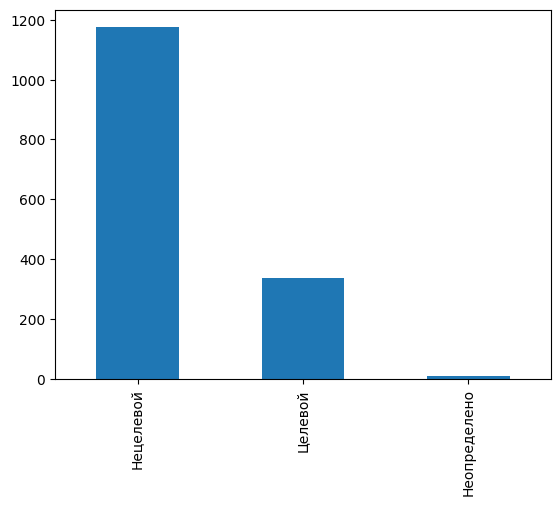

In [ ]:
# Соотношение классов
Primavera_new_df['Класс'].value_counts().plot.bar()

##### Проект

In [ ]:
Primavera_new_df.shape

(1523, 73)

In [ ]:
# Добавляем столбец 'Проект'
Primavera_new_df['Проект'] = 'Primavera'

In [ ]:
Primavera_new_df.shape

(1523, 74)

#### Анализ и сравнение датафреймов

In [ ]:
# Размеры
print(Primavera_df.shape)
print(Primavera_new_df.shape)
print()
print(Primavera_calls_df.shape)
print(Primavera_new_calls_df.shape)

(3972, 77)
(1523, 74)

(1983, 5)
(767, 5)


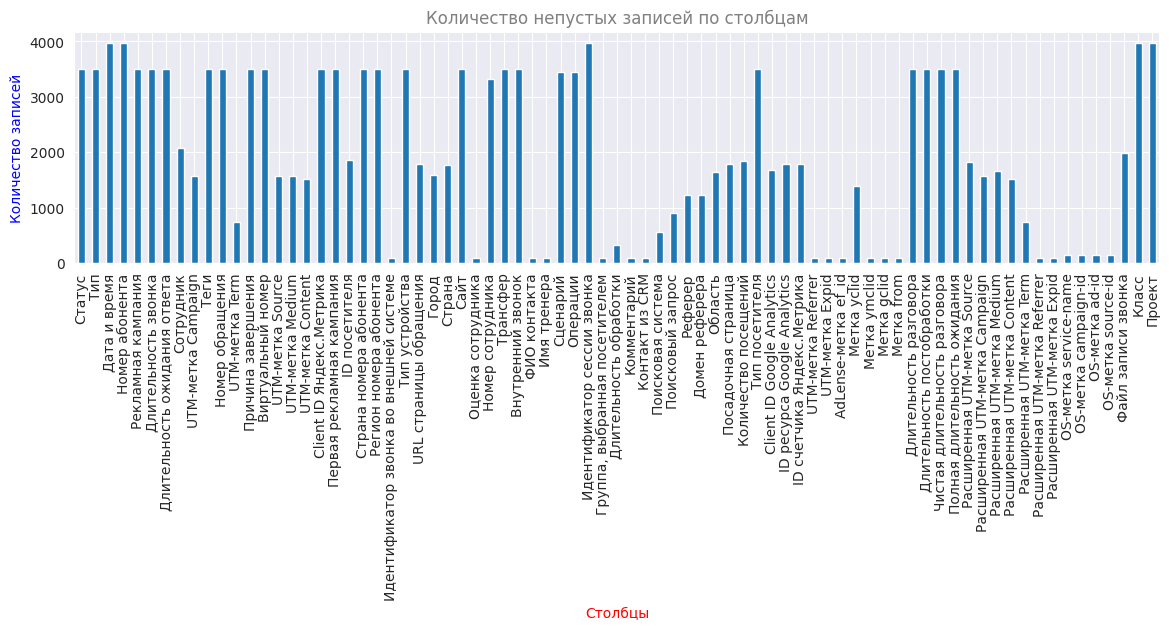

In [ ]:
# @title График Data.count
Data = Primavera_df # @param {type:"raw"}
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(14,3))
counts = Data.count()
ax = counts.plot.bar()
ax.set_xlabel('Столбцы', c='r')
ax.set_ylabel('Количество записей', c='b')
ax.set_title('Количество непустых записей по столбцам', c='gray')

plt.show()

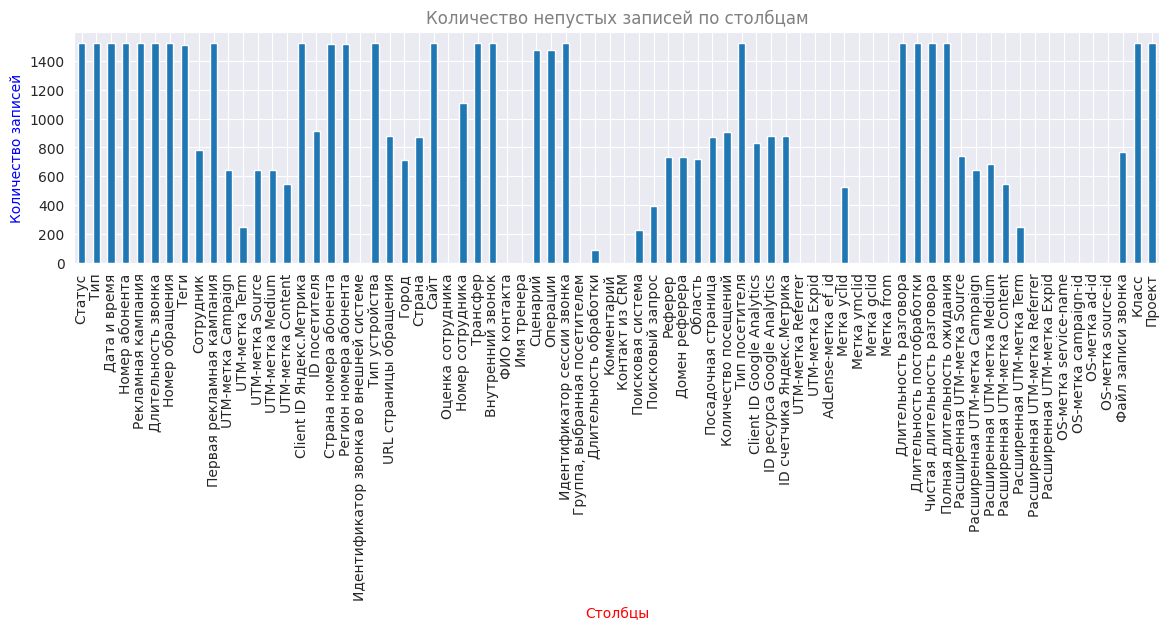

In [ ]:
# @title График Data.count
Data = Primavera_new_df # @param {type:"raw"}
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(14,3))
counts = Data.count()
ax = counts.plot.bar()
ax.set_xlabel('Столбцы', c='r')
ax.set_ylabel('Количество записей', c='b')
ax.set_title('Количество непустых записей по столбцам', c='gray')

plt.show()

#### Сохранение датафреймов

In [ ]:
# Сортируем по столбцу 'Идентификатор сессии звонка'
Primavera_df = Primavera_df.sort_values('Идентификатор сессии звонка')
Primavera_new_df = Primavera_new_df.sort_values('Идентификатор сессии звонка')
Primavera_df.index = range(Primavera_df.shape[0])
Primavera_new_df.index = range(Primavera_new_df.shape[0])

In [ ]:
# Сохраняем Primavera_df в pkl
with open(df_path + 'Primavera_df.pkl', 'wb') as f:
  pkl.dump(Primavera_df, f)

# Сохраняем Primavera_new_df в pkl
with open(df_path + 'Primavera_new_df.pkl', 'wb') as f:
  pkl.dump(Primavera_new_df, f)

### Paveletskaya_city

#### Загрузка датафреймов

In [8]:
# Загружаем Paveletskaya_df из pkl
with open(df_path + 'Paveletskaya_df.pkl', 'rb') as f:
  Paveletskaya_df = pkl.load(f)

# Загружаем Paveletskaya_city_df из pkl
with open(df_path + 'Paveletskaya_city_df.pkl', 'rb') as f:
  Paveletskaya_city_df = pkl.load(f)

# Загружаем Paveletskaya_city_new_df из pkl
with open(df_path + 'Paveletskaya_city_new_df.pkl', 'rb') as f:
  Paveletskaya_city_new_df = pkl.load(f)

In [9]:
# Загружаем Paveletskaya_city_calls_df из pkl
with open(df_path + 'Paveletskaya_city_calls_df.pkl', 'rb') as f:
  Paveletskaya_city_calls_df = pkl.load(f)

# Загружаем Paveletskaya_city_new_calls_df из pkl
with open(df_path + 'Paveletskaya_city_new_calls_df.pkl', 'rb') as f:
  Paveletskaya_city_new_calls_df = pkl.load(f)

#### Первичная предобработка `Paveletskaya_df`

##### Дата и время

In [ ]:
Paveletskaya_df['Дата и время'].head()

0    2023-07-27 14:53:43
1    2023-07-26 12:57:19
2    2023-07-20 19:14:10
3    2023-07-18 14:54:11
4    2023-07-18 13:51:58
Name: Дата и время, dtype: object

In [ ]:
# Приводим тип данных столбца 'Дата и время'
Paveletskaya_df['Дата и время'] = pd.to_datetime(Paveletskaya_df['Дата и время'])

In [ ]:
Paveletskaya_df['Дата и время'].tail()

1206   2023-05-03 16:43:18
1207   2023-05-03 06:28:01
1208   2023-05-03 06:27:25
1209   2023-05-02 19:52:09
1210   2023-05-02 02:04:42
Name: Дата и время, dtype: datetime64[ns]

##### Идентификатор сессии звонка

In [ ]:
Paveletskaya_df['Идентификатор сессии звонка'].head()

0    3119627257
1    3117258020
2    3100917048
3    3098289147
4    3098031427
Name: Идентификатор сессии звонка, dtype: int64

In [ ]:
Paveletskaya_df['Идентификатор сессии звонка'].tail()

1206    2920652145
1207    2918275207
1208    2918275147
1209    2918676957
1210    2915798223
Name: Идентификатор сессии звонка, dtype: int64

##### Длительность звонка

In [ ]:
Paveletskaya_df['Длительность звонка'].head()

0    00:00:01
1    00:00:10
2    00:00:23
3    00:01:00
4    00:00:02
Name: Длительность звонка, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность звонка'
Paveletskaya_df['Длительность звонка'] = pd.to_datetime(Paveletskaya_df['Длительность звонка']).dt.time

In [ ]:
# Переводим значение в количество секунд
Paveletskaya_df['Длительность звонка'] = Paveletskaya_df['Длительность звонка'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Paveletskaya_df['Длительность звонка'].tail()

1206    14
1207     0
1208    14
1209    60
1210     6
Name: Длительность звонка, dtype: int64

In [ ]:
# Минимальная длительность звонка
Paveletskaya_df['Длительность звонка'].min()

0

In [ ]:
# Максимальная длительность звонка
Paveletskaya_df['Длительность звонка'].max()

377

In [ ]:
# Средняя длительность звонка
Paveletskaya_df['Длительность звонка'].mean()

15.676300578034683

##### Длительность ожидания ответа

In [ ]:
Paveletskaya_df['Длительность ожидания ответа'].head()

0    00:00:01
1    00:00:03
2    00:00:01
3    00:00:01
4    00:00:01
Name: Длительность ожидания ответа, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность ожидания ответа'
Paveletskaya_df['Длительность ожидания ответа'] = pd.to_datetime(Paveletskaya_df['Длительность ожидания ответа']).dt.time

In [ ]:
# Переводим значение в количество секунд
Paveletskaya_df['Длительность ожидания ответа'] = Paveletskaya_df['Длительность ожидания ответа'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Paveletskaya_df['Длительность ожидания ответа'].tail()

1206    2
1207    0
1208    3
1209    2
1210    2
Name: Длительность ожидания ответа, dtype: int64

In [ ]:
# Минимальная длительность ожидания ответа
Paveletskaya_df['Длительность ожидания ответа'].min()

0

In [ ]:
# Максимальная длительность ожидания ответа
Paveletskaya_df['Длительность ожидания ответа'].max()

32

In [ ]:
# Средняя длительность ожидания ответа
Paveletskaya_df['Длительность ожидания ответа'].mean()

13.966143682906688

##### Полная длительность ожидания

In [ ]:
Paveletskaya_df['Полная длительность ожидания'].head()

0    00:00:01
1    00:00:03
2    00:00:01
3    00:00:01
4    00:00:01
Name: Полная длительность ожидания, dtype: object

In [ ]:
# Приводим тип данных столбца 'Полная длительность ожидания'
Paveletskaya_df['Полная длительность ожидания'] = pd.to_datetime(Paveletskaya_df['Полная длительность ожидания']).dt.time

In [ ]:
# Переводим значение в количество секунд
Paveletskaya_df['Полная длительность ожидания'] = Paveletskaya_df['Полная длительность ожидания'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Paveletskaya_df['Полная длительность ожидания'].tail()

1206    2
1207    0
1208    3
1209    2
1210    2
Name: Полная длительность ожидания, dtype: int64

In [ ]:
# Минимальная полная длительность ожидания
Paveletskaya_df['Полная длительность ожидания'].min()

0

In [ ]:
# Максимальная полная длительность ожидания
Paveletskaya_df['Полная длительность ожидания'].max()

32

In [ ]:
# Средняя полная длительность ожидания
Paveletskaya_df['Полная длительность ожидания'].mean()

13.975227085053675

##### Длительность разговора

In [ ]:
Paveletskaya_df['Длительность разговора'].head()

0    00:00:00
1    00:00:07
2    00:00:22
3    00:00:59
4    00:00:01
Name: Длительность разговора, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность разговора'
Paveletskaya_df['Длительность разговора'] = pd.to_datetime(Paveletskaya_df['Длительность разговора']).dt.time

In [ ]:
# Переводим значение в количество секунд
Paveletskaya_df['Длительность разговора'] = Paveletskaya_df['Длительность разговора'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Paveletskaya_df['Длительность разговора'].tail()

1206    12
1207     0
1208    11
1209    58
1210     4
Name: Длительность разговора, dtype: int64

In [ ]:
# Минимальная длительность разговора
Paveletskaya_df['Длительность разговора'].min()

0

In [ ]:
# Максимальная длительность разговора
Paveletskaya_df['Длительность разговора'].max()

375

In [ ]:
# Средняя длительность разговора
Paveletskaya_df['Длительность разговора'].mean()

1.7101568951279933

##### Длительность постобработки

In [ ]:
Paveletskaya_df['Длительность постобработки'].head()

0    00:00:00
1    00:00:00
2    00:00:00
3    00:00:00
4    00:00:00
Name: Длительность постобработки, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность постобработки'
Paveletskaya_df['Длительность постобработки'] = pd.to_datetime(Paveletskaya_df['Длительность постобработки']).dt.time

In [ ]:
# Переводим значение в количество секунд
Paveletskaya_df['Длительность постобработки'] = Paveletskaya_df['Длительность постобработки'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Paveletskaya_df['Длительность постобработки'].tail()

1206    0
1207    0
1208    0
1209    0
1210    0
Name: Длительность постобработки, dtype: int64

In [ ]:
# Минимальная длительность постобработки
Paveletskaya_df['Длительность постобработки'].min()

0

In [ ]:
# Максимальная длительность постобработки
Paveletskaya_df['Длительность постобработки'].max()

0

In [ ]:
# Средняя длительность постобработки
Paveletskaya_df['Длительность постобработки'].mean()

0.0

##### Чистая длительность разговора

In [ ]:
Paveletskaya_df['Чистая длительность разговора'].head()

0    00:00:00
1    00:00:07
2    00:00:22
3    00:00:59
4    00:00:01
Name: Чистая длительность разговора, dtype: object

In [ ]:
# Приводим тип данных столбца 'Чистая длительность разговора'
Paveletskaya_df['Чистая длительность разговора'] = pd.to_datetime(Paveletskaya_df['Чистая длительность разговора']).dt.time

In [ ]:
# Переводим значение в количество секунд
Paveletskaya_df['Чистая длительность разговора'] = Paveletskaya_df['Чистая длительность разговора'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Paveletskaya_df['Чистая длительность разговора'].tail()

1206    12
1207     0
1208    11
1209    58
1210     4
Name: Чистая длительность разговора, dtype: int64

In [ ]:
# Минимальная чистая длительность разговора
Paveletskaya_df['Чистая длительность разговора'].min()

0

In [ ]:
# Максимальная чистая длительность разговора
Paveletskaya_df['Чистая длительность разговора'].max()

375

In [ ]:
# Средняя чистая длительность разговора
Paveletskaya_df['Чистая длительность разговора'].mean()

1.7010734929810074

##### Номер обращения

In [ ]:
Paveletskaya_df['Номер обращения'].head()

0    1
1    1
2    1
3    1
4    2
Name: Номер обращения, dtype: int64

In [ ]:
Paveletskaya_df['Номер обращения'].tail()

1206    1
1207    2
1208    1
1209    1
1210    4
Name: Номер обращения, dtype: int64

##### Файл записи звонка

In [ ]:
Paveletskaya_df.shape

(1211, 74)

In [ ]:
# Добавляем столбец 'Файл записи звонка'
Paveletskaya_df = Paveletskaya_df.merge(Paveletskaya_city_calls_df[['Идентификатор сессии звонка','Файл записи звонка']], how='outer', on=['Идентификатор сессии звонка'])
Paveletskaya_df.shape

(2203, 75)

In [ ]:
Paveletskaya_df['Файл записи звонка'][~Paveletskaya_df['Файл записи звонка'].isnull()].head()

3    Записи звонков/Записи звонков_павелецкая сити/2023-07-18_14-54-12.903688_from_79680573141_to_74955141111_session_3098289147_talk.mp3
4    Записи звонков/Записи звонков_павелецкая сити/2023-07-18_13-51-59.127269_from_78005055934_to_74955141111_session_3098031427_talk.mp3
5    Записи звонков/Записи звонков_павелецкая сити/2023-07-14_14-11-49.712590_from_79029502470_to_74955141111_session_3095279810_talk.mp3
6    Записи звонков/Записи звонков_павелецкая сити/2023-07-11_18-13-13.999706_from_79274147009_to_74955141111_session_3081712381_talk.mp3
8    Записи звонков/Записи звонков_павелецкая сити/2023-06-27_15-04-43.293132_from_79036175926_to_74955141111_session_3051069194_talk.mp3
Name: Файл записи звонка, dtype: object

In [ ]:
# Оставляем исходное количество записей
Paveletskaya_df = Paveletskaya_df[Paveletskaya_df['Дата и время'].notna()]

In [ ]:
Paveletskaya_df['Файл записи звонка'].count()

8

##### Теги

In [ ]:
# Доля непустых записей
print(Paveletskaya_df['Теги'].count())
print(Paveletskaya_df.shape[0])

1189
2203


In [ ]:
# Количество уникальных тегов
Paveletskaya_df['Теги'].nunique()

3

In [ ]:
# Количество уникальных тегов целевых звонков
Paveletskaya_df['Теги'][~Paveletskaya_df['Теги'].isnull()][Paveletskaya_df['Теги'][~Paveletskaya_df['Теги'].isnull()].str.contains('Целевой_М108')].nunique()

0

In [ ]:
# Количество уникальных тегов нецелевых звонков
Paveletskaya_df['Теги'][~Paveletskaya_df['Теги'].isnull()][~Paveletskaya_df['Теги'][~Paveletskaya_df['Теги'].isnull()].str.contains('Целевой_М108')].nunique()

3

In [ ]:
# Теги целевых звонков
Paveletskaya_df['Теги'][~Paveletskaya_df['Теги'].isnull()][Paveletskaya_df['Теги'][~Paveletskaya_df['Теги'].isnull()].str.contains('Целевой_М108')].unique()

array([], dtype=object)

In [ ]:
# Теги нецелевых звонков
Paveletskaya_df['Теги'][~Paveletskaya_df['Теги'].isnull()][~Paveletskaya_df['Теги'][~Paveletskaya_df['Теги'].isnull()].str.contains('Целевой_М108')].unique()

array(['Не обработано - Нецелевой контакт', 'Нецелевой контакт',
       'Обработано - Нецелевой контакт'], dtype=object)

##### Класс

In [ ]:
Paveletskaya_df.shape

(2203, 75)

In [ ]:
# Добавляем столбец 'Класс'
Paveletskaya_df['Класс'] = 'Неопределено'

In [ ]:
# Список тегов целевых звонков
target_teg_list = []
pattern = '.*Целевой_М108.*'
for teg in Paveletskaya_df['Теги'][~Paveletskaya_df['Теги'].isnull()].unique():
  if re.findall(pattern.lower(), teg.lower()):
    target_teg_list.append(teg)

In [ ]:
# Размечаем целевые звонки
Paveletskaya_df.loc[Paveletskaya_df['Теги'].isin(target_teg_list), 'Класс'] = 'Целевой'

In [ ]:
# Список тегов нецелевых звонков
not_target_teg_list = []
pattern = '.*Целевой_М108.*'
for teg in Paveletskaya_df['Теги'][~Paveletskaya_df['Теги'].isnull()].unique():
  if not re.findall(pattern.lower(), teg.lower()):
    not_target_teg_list.append(teg)

In [ ]:
# Размечаем нецелевые звонки
Paveletskaya_df.loc[Paveletskaya_df['Теги'].isin(not_target_teg_list), 'Класс'] = 'Нецелевой'

In [10]:
# Соотношение классов
print(Paveletskaya_df['Класс'][Paveletskaya_df['Класс'] == 'Целевой'].count())
print(Paveletskaya_df['Класс'][Paveletskaya_df['Класс'] == 'Нецелевой'].count())
print(Paveletskaya_df['Класс'][Paveletskaya_df['Класс'] == 'Неопределено'].count())
print('----')
print(Paveletskaya_df['Класс'][Paveletskaya_df['Класс'] == 'Целевой'].count()   +
      Paveletskaya_df['Класс'][Paveletskaya_df['Класс'] == 'Нецелевой'].count() +
      Paveletskaya_df['Класс'][Paveletskaya_df['Класс'] == 'Неопределено'].count())

0
1189
22
----
1211


<Axes: >

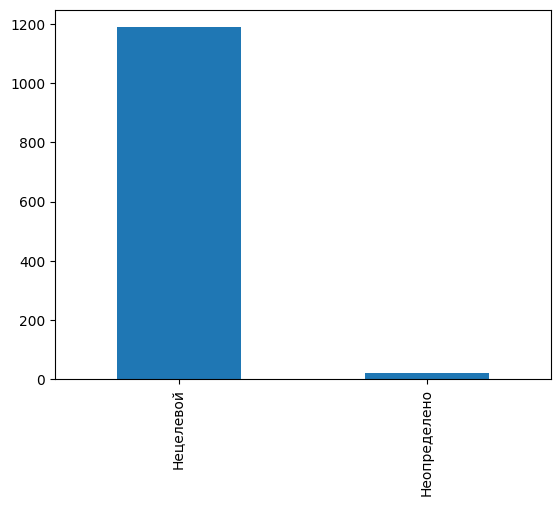

In [11]:
# Соотношение классов
Paveletskaya_df['Класс'].value_counts().plot.bar()

##### Проект

In [ ]:
Paveletskaya_df.shape

(2203, 76)

In [ ]:
# Добавляем столбец 'Проект'
Paveletskaya_df['Проект'] = 'Paveletskaya_city'

In [ ]:
Paveletskaya_df.shape

(2203, 77)

#### Первичная предобработка `Paveletskaya_city_df`

##### Дата и время

In [12]:
Paveletskaya_city_df['Дата и время'].head()

0    2023-07-31 20:35:42
1    2023-07-31 19:52:57
2    2023-07-31 19:21:06
3    2023-07-31 19:18:04
4    2023-07-31 19:16:16
Name: Дата и время, dtype: object

In [13]:
# Приводим тип данных столбца 'Дата и время'
Paveletskaya_city_df['Дата и время'] = pd.to_datetime(Paveletskaya_city_df['Дата и время'])

In [14]:
Paveletskaya_city_df['Дата и время'].tail()

9322   2023-07-11 11:41:21
9323   2023-07-09 09:07:41
9324   2023-06-02 13:03:49
9325   2023-05-31 11:52:06
9326   2023-05-31 11:47:40
Name: Дата и время, dtype: datetime64[ns]

##### Идентификатор сессии звонка

In [15]:
Paveletskaya_city_df['Идентификатор сессии звонка'].head()

0    3124221769
1    3127090775
2    3124131804
3    3124131189
4    3124119339
Name: Идентификатор сессии звонка, dtype: object

In [16]:
# Приводим тип данных столбца 'Идентификатор сессии звонка'
Paveletskaya_city_df = Paveletskaya_city_df.astype({'Идентификатор сессии звонка': int})

In [17]:
Paveletskaya_city_df['Идентификатор сессии звонка'].tail()

9322    3088450090
9323    3075505209
9324    2979927191
9325    2960180570
9326    2975586733
Name: Идентификатор сессии звонка, dtype: int64

##### Длительность звонка

In [18]:
Paveletskaya_city_df['Длительность звонка'].head()

0    00:00:37
1    00:04:06
2    00:00:36
3    00:00:45
4    00:05:08
Name: Длительность звонка, dtype: object

In [19]:
# Приводим тип данных столбца 'Длительность звонка'
Paveletskaya_city_df['Длительность звонка'] = pd.to_datetime(Paveletskaya_city_df['Длительность звонка']).dt.time

In [20]:
# Переводим значение в количество секунд
Paveletskaya_city_df['Длительность звонка'] = Paveletskaya_city_df['Длительность звонка'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [21]:
Paveletskaya_city_df['Длительность звонка'].tail()

9322     33
9323     56
9324    322
9325    180
9326     53
Name: Длительность звонка, dtype: int64

In [22]:
# Минимальная длительность звонка
Paveletskaya_city_df['Длительность звонка'].min()

0

In [23]:
# Максимальная длительность звонка
Paveletskaya_city_df['Длительность звонка'].max()

2571

In [24]:
# Средняя длительность звонка
Paveletskaya_city_df['Длительность звонка'].mean()

70.35885064865444

##### Длительность ожидания ответа

In [25]:
Paveletskaya_city_df['Длительность ожидания ответа'].head()

0    00:00:37
1    00:00:02
2    00:00:36
3    00:00:40
4    00:00:01
Name: Длительность ожидания ответа, dtype: object

In [26]:
# Приводим тип данных столбца 'Длительность ожидания ответа'
Paveletskaya_city_df['Длительность ожидания ответа'] = pd.to_datetime(Paveletskaya_city_df['Длительность ожидания ответа']).dt.time

In [27]:
# Переводим значение в количество секунд
Paveletskaya_city_df['Длительность ожидания ответа'] = Paveletskaya_city_df['Длительность ожидания ответа'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [28]:
Paveletskaya_city_df['Длительность ожидания ответа'].tail()

9322    1
9323    1
9324    2
9325    2
9326    1
Name: Длительность ожидания ответа, dtype: int64

In [29]:
# Минимальная длительность ожидания ответа
Paveletskaya_city_df['Длительность ожидания ответа'].min()

0

In [30]:
# Максимальная длительность ожидания ответа
Paveletskaya_city_df['Длительность ожидания ответа'].max()

482

In [31]:
# Средняя длительность ожидания ответа
Paveletskaya_city_df['Длительность ожидания ответа'].mean()

12.60362388763804

##### Полная длительность ожидания

In [32]:
Paveletskaya_city_df['Полная длительность ожидания'].head()

0    00:00:37
1    00:00:02
2    00:00:36
3    00:00:40
4    00:00:01
Name: Полная длительность ожидания, dtype: object

In [33]:
# Приводим тип данных столбца 'Полная длительность ожидания'
Paveletskaya_city_df['Полная длительность ожидания'] = pd.to_datetime(Paveletskaya_city_df['Полная длительность ожидания']).dt.time

In [34]:
# Переводим значение в количество секунд
Paveletskaya_city_df['Полная длительность ожидания'] = Paveletskaya_city_df['Полная длительность ожидания'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [35]:
Paveletskaya_city_df['Полная длительность ожидания'].tail()

9322    2
9323    1
9324    2
9325    2
9326    1
Name: Полная длительность ожидания, dtype: int64

In [36]:
# Минимальная полная длительность ожидания
Paveletskaya_city_df['Полная длительность ожидания'].min()

0

In [37]:
# Максимальная полная длительность ожидания
Paveletskaya_city_df['Полная длительность ожидания'].max()

482

In [38]:
# Средняя полная длительность ожидания
Paveletskaya_city_df['Полная длительность ожидания'].mean()

12.679532539937815

##### Длительность разговора

In [39]:
Paveletskaya_city_df['Длительность разговора'].head()

0    00:00:00
1    00:04:04
2    00:00:00
3    00:00:05
4    00:05:07
Name: Длительность разговора, dtype: object

In [40]:
# Приводим тип данных столбца 'Длительность разговора'
Paveletskaya_city_df['Длительность разговора'] = pd.to_datetime(Paveletskaya_city_df['Длительность разговора']).dt.time

In [41]:
# Переводим значение в количество секунд
Paveletskaya_city_df['Длительность разговора'] = Paveletskaya_city_df['Длительность разговора'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [42]:
Paveletskaya_city_df['Длительность разговора'].tail()

9322     32
9323     55
9324    320
9325    178
9326     52
Name: Длительность разговора, dtype: int64

In [43]:
# Минимальная длительность разговора
Paveletskaya_city_df['Длительность разговора'].min()

0

In [44]:
# Максимальная длительность разговора
Paveletskaya_city_df['Длительность разговора'].max()

2532

In [45]:
# Средняя длительность разговора
Paveletskaya_city_df['Длительность разговора'].mean()

57.7552267610164

##### Длительность постобработки

In [46]:
Paveletskaya_city_df['Длительность постобработки'].head()

0    00:00:00
1    00:00:00
2    00:00:00
3    00:00:00
4    00:00:00
Name: Длительность постобработки, dtype: object

In [47]:
# Приводим тип данных столбца 'Длительность постобработки'
Paveletskaya_city_df['Длительность постобработки'] = pd.to_datetime(Paveletskaya_city_df['Длительность постобработки']).dt.time

In [48]:
# Переводим значение в количество секунд
Paveletskaya_city_df['Длительность постобработки'] = Paveletskaya_city_df['Длительность постобработки'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [49]:
Paveletskaya_city_df['Длительность постобработки'].tail()

9322    0
9323    0
9324    0
9325    0
9326    0
Name: Длительность постобработки, dtype: int64

In [50]:
# Минимальная длительность постобработки
Paveletskaya_city_df['Длительность постобработки'].min()

0

In [51]:
# Максимальная длительность постобработки
Paveletskaya_city_df['Длительность постобработки'].max()

0

In [52]:
# Средняя длительность постобработки
Paveletskaya_city_df['Длительность постобработки'].mean()

0.0

##### Чистая длительность разговора

In [53]:
Paveletskaya_city_df['Чистая длительность разговора'].head()

0    00:00:00
1    00:04:04
2    00:00:00
3    00:00:05
4    00:05:07
Name: Чистая длительность разговора, dtype: object

In [54]:
# Приводим тип данных столбца 'Чистая длительность разговора'
Paveletskaya_city_df['Чистая длительность разговора'] = pd.to_datetime(Paveletskaya_city_df['Чистая длительность разговора']).dt.time

In [55]:
# Переводим значение в количество секунд
Paveletskaya_city_df['Чистая длительность разговора'] = Paveletskaya_city_df['Чистая длительность разговора'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [56]:
Paveletskaya_city_df['Чистая длительность разговора'].tail()

9322     31
9323     55
9324    320
9325    178
9326     52
Name: Чистая длительность разговора, dtype: int64

In [57]:
# Минимальная чистая длительность разговора
Paveletskaya_city_df['Чистая длительность разговора'].min()

0

In [58]:
# Максимальная чистая длительность разговора
Paveletskaya_city_df['Чистая длительность разговора'].max()

2532

In [59]:
# Средняя чистая длительность разговора
Paveletskaya_city_df['Чистая длительность разговора'].mean()

57.67931810871663

##### Номер обращения

In [60]:
Paveletskaya_city_df['Номер обращения'].head()

0     3.0
1     1.0
2    63.0
3    60.0
4     9.0
Name: Номер обращения, dtype: object

In [62]:
# Избавляемся от пустот в столбце 'Номер обращения'
Paveletskaya_city_df['Номер обращения'] = Paveletskaya_city_df['Номер обращения'].fillna('0')

In [63]:
# Приводим тип данных столбца 'Номер обращения'
Paveletskaya_city_df = Paveletskaya_city_df.astype({'Номер обращения': int})

In [64]:
Paveletskaya_city_df['Номер обращения'].tail()

9322    2
9323    2
9324    2
9325    3
9326    2
Name: Номер обращения, dtype: int64

##### Файл записи звонка

In [65]:
Paveletskaya_city_df.shape

(9327, 74)

In [66]:
# Добавляем столбец 'Файл записи звонка'
Paveletskaya_city_df = Paveletskaya_city_df.merge(Paveletskaya_city_calls_df[['Идентификатор сессии звонка','Файл записи звонка']], how='outer', on=['Идентификатор сессии звонка'])
Paveletskaya_city_df.shape

(9335, 75)

In [67]:
Paveletskaya_city_df['Файл записи звонка'][~Paveletskaya_city_df['Файл записи звонка'].isnull()].head()

363    Записи звонков/Записи звонков_павелецкая сити/2023-07-20_11-43-09.262964_from_79166458242_to_74950216267_session_3099686224_talk.mp3
364    Записи звонков/Записи звонков_павелецкая сити/2023-07-20_11-37-36.619972_from_79112808417_to_74955141111_session_3100336696_talk.mp3
365    Записи звонков/Записи звонков_павелецкая сити/2023-07-20_11-37-11.094292_from_79099624838_to_74950216267_session_3105745185_talk.mp3
366    Записи звонков/Записи звонков_павелецкая сити/2023-07-20_11-36-59.633997_from_79169021186_to_74950216267_session_3100336231_talk.mp3
367    Записи звонков/Записи звонков_павелецкая сити/2023-07-20_11-33-48.269480_from_79168455509_to_74955141111_session_3099626809_talk.mp3
Name: Файл записи звонка, dtype: object

In [69]:
# Оставляем исходное количество записей
Paveletskaya_city_df = Paveletskaya_city_df[Paveletskaya_city_df['Дата и время'].notna()]

In [70]:
Paveletskaya_city_df['Файл записи звонка'].count()

992

##### Теги

In [74]:
# Доля непустых записей
print(Paveletskaya_city_df['Теги'].count())
print(Paveletskaya_city_df.shape[0])

7895
9327


In [75]:
# Количество уникальных тегов
Paveletskaya_city_df['Теги'].nunique()

11

In [76]:
# Количество уникальных тегов целевых звонков
Paveletskaya_city_df['Теги'][~Paveletskaya_city_df['Теги'].isnull()][Paveletskaya_city_df['Теги'][~Paveletskaya_city_df['Теги'].isnull()].str.contains('Целевой_М108')].nunique()

4

In [77]:
# Количество уникальных тегов нецелевых звонков
Paveletskaya_city_df['Теги'][~Paveletskaya_city_df['Теги'].isnull()][~Paveletskaya_city_df['Теги'][~Paveletskaya_city_df['Теги'].isnull()].str.contains('Целевой_М108')].nunique()

7

In [78]:
# Теги целевых звонков
Paveletskaya_city_df['Теги'][~Paveletskaya_city_df['Теги'].isnull()][Paveletskaya_city_df['Теги'][~Paveletskaya_city_df['Теги'].isnull()].str.contains('Целевой_М108')].unique()

array(['Целевой_М108', 'Нецелевой контакт - Целевой_М108',
       'Обработано - Нецелевой контакт - Целевой_М108',
       'CRM_Павелецкая сити - Целевой_М108'], dtype=object)

In [79]:
# Теги нецелевых звонков
Paveletskaya_city_df['Теги'][~Paveletskaya_city_df['Теги'].isnull()][~Paveletskaya_city_df['Теги'][~Paveletskaya_city_df['Теги'].isnull()].str.contains('Целевой_М108')].unique()

array(['Не обработано - Нецелевой контакт', 'Нецелевой контакт',
       'Обработано - Нецелевой контакт', 'Нецелевой', 'Не обработано',
       'Коммерция_целевой_М108', ''], dtype=object)

##### Класс

In [80]:
Paveletskaya_city_df.shape

(9327, 75)

In [81]:
# Добавляем столбец 'Класс'
Paveletskaya_city_df['Класс'] = 'Неопределено'

In [82]:
# Список тегов целевых звонков
target_teg_list = []
pattern = '.*Целевой_М108.*'
for teg in Paveletskaya_city_df['Теги'][~Paveletskaya_city_df['Теги'].isnull()].unique():
  if re.findall(pattern.lower(), teg.lower()):
    target_teg_list.append(teg)

In [83]:
# Размечаем целевые звонки
Paveletskaya_city_df.loc[Paveletskaya_city_df['Теги'].isin(target_teg_list), 'Класс'] = 'Целевой'

In [84]:
# Список тегов нецелевых звонков
not_target_teg_list = []
pattern = '.*Целевой_М108.*'
for teg in Paveletskaya_city_df['Теги'][~Paveletskaya_city_df['Теги'].isnull()].unique():
  if not re.findall(pattern.lower(), teg.lower()):
    not_target_teg_list.append(teg)

In [85]:
# Размечаем нецелевые звонки
Paveletskaya_city_df.loc[Paveletskaya_city_df['Теги'].isin(not_target_teg_list), 'Класс'] = 'Нецелевой'

In [86]:
# Соотношение классов
print(Paveletskaya_city_df['Класс'][Paveletskaya_city_df['Класс'] == 'Целевой'].count())
print(Paveletskaya_city_df['Класс'][Paveletskaya_city_df['Класс'] == 'Нецелевой'].count())
print(Paveletskaya_city_df['Класс'][Paveletskaya_city_df['Класс'] == 'Неопределено'].count())
print('----')
print(Paveletskaya_city_df['Класс'][Paveletskaya_city_df['Класс'] == 'Целевой'].count()   +
      Paveletskaya_city_df['Класс'][Paveletskaya_city_df['Класс'] == 'Нецелевой'].count() +
      Paveletskaya_city_df['Класс'][Paveletskaya_city_df['Класс'] == 'Неопределено'].count())

505
7390
1432
----
9327


<Axes: >

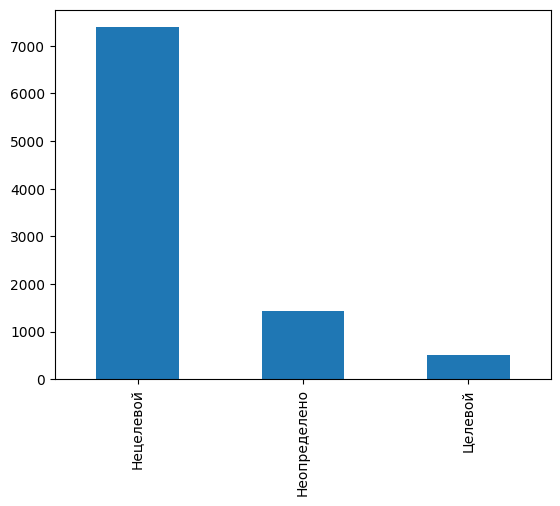

In [87]:
# Соотношение классов
Paveletskaya_city_df['Класс'].value_counts().plot.bar()

##### Проект

In [88]:
Paveletskaya_city_df.shape

(9327, 76)

In [89]:
# Добавляем столбец 'Проект'
Paveletskaya_city_df['Проект'] = 'Paveletskaya_city'

In [90]:
Paveletskaya_city_df.shape

(9327, 77)

#### Первичная предобработка `Paveletskaya_city_new_df`

##### Дата и время

In [91]:
Paveletskaya_city_new_df['Дата и время'].head()

0    2023-10-04 22:46:01
1    2023-10-04 20:02:36
2    2023-10-04 19:49:06
3    2023-10-04 19:39:00
4    2023-10-04 19:01:47
Name: Дата и время, dtype: object

In [92]:
# Приводим тип данных столбца 'Дата и время'
Paveletskaya_city_new_df['Дата и время'] = pd.to_datetime(Paveletskaya_city_new_df['Дата и время'])

In [93]:
Paveletskaya_city_new_df['Дата и время'].tail()

1513   2023-08-15 09:08:26
1514   2023-08-15 09:01:30
1515   2023-08-15 09:01:23
1516   2023-08-15 09:01:02
1517   2023-08-15 09:00:04
Name: Дата и время, dtype: datetime64[ns]

##### Идентификатор сессии звонка

In [94]:
Paveletskaya_city_new_df['Идентификатор сессии звонка'].head()

0    3264400553
1    3264319898
2    3269863984
3    3269876069
4    3269823834
Name: Идентификатор сессии звонка, dtype: int64

In [95]:
Paveletskaya_city_new_df['Идентификатор сессии звонка'].tail()

1513    3155178349
1514    3155993466
1515    3155994241
1516    3155158169
1517    3155155674
Name: Идентификатор сессии звонка, dtype: int64

##### Длительность звонка

In [96]:
Paveletskaya_city_new_df['Длительность звонка'].head()

0    00:00:06
1    00:00:03
2    00:20:46
3    00:00:33
4    00:00:48
Name: Длительность звонка, dtype: object

In [97]:
# Приводим тип данных столбца 'Длительность звонка'
Paveletskaya_city_new_df['Длительность звонка'] = pd.to_datetime(Paveletskaya_city_new_df['Длительность звонка']).dt.time

In [98]:
# Переводим значение в количество секунд
Paveletskaya_city_new_df['Длительность звонка'] = Paveletskaya_city_new_df['Длительность звонка'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [99]:
Paveletskaya_city_new_df['Длительность звонка'].tail()

1513    55
1514     3
1515     7
1516    38
1517    57
Name: Длительность звонка, dtype: int64

In [100]:
# Минимальная длительность звонка
Paveletskaya_city_new_df['Длительность звонка'].min()

0

In [101]:
# Максимальная длительность звонка
Paveletskaya_city_new_df['Длительность звонка'].max()

1780

In [102]:
# Средняя длительность звонка
Paveletskaya_city_new_df['Длительность звонка'].mean()

195.61660079051384

##### Длительность ожидания ответа

In [103]:
Paveletskaya_city_new_df['Длительность ожидания ответа'].head()

0    00:00:00
1    00:00:00
2    00:00:00
3    00:00:33
4    00:00:48
Name: Длительность ожидания ответа, dtype: object

In [104]:
# Приводим тип данных столбца 'Длительность ожидания ответа'
Paveletskaya_city_new_df['Длительность ожидания ответа'] = pd.to_datetime(Paveletskaya_city_new_df['Длительность ожидания ответа']).dt.time

In [105]:
# Переводим значение в количество секунд
Paveletskaya_city_new_df['Длительность ожидания ответа'] = Paveletskaya_city_new_df['Длительность ожидания ответа'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [106]:
Paveletskaya_city_new_df['Длительность ожидания ответа'].tail()

1513    55
1514     0
1515     0
1516    32
1517    57
Name: Длительность ожидания ответа, dtype: int64

In [107]:
# Минимальная длительность ожидания ответа
Paveletskaya_city_new_df['Длительность ожидания ответа'].min()

0

In [108]:
# Максимальная длительность ожидания ответа
Paveletskaya_city_new_df['Длительность ожидания ответа'].max()

644

In [109]:
# Средняя длительность ожидания ответа
Paveletskaya_city_new_df['Длительность ожидания ответа'].mean()

10.599472990777338

##### Полная длительность ожидания

In [110]:
Paveletskaya_city_new_df['Полная длительность ожидания'].head()

0    00:00:01
1    00:00:01
2    00:00:00
3    00:00:33
4    00:00:48
Name: Полная длительность ожидания, dtype: object

In [111]:
# Приводим тип данных столбца 'Полная длительность ожидания'
Paveletskaya_city_new_df['Полная длительность ожидания'] = pd.to_datetime(Paveletskaya_city_new_df['Полная длительность ожидания']).dt.time

In [112]:
# Переводим значение в количество секунд
Paveletskaya_city_new_df['Полная длительность ожидания'] = Paveletskaya_city_new_df['Полная длительность ожидания'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [113]:
Paveletskaya_city_new_df['Полная длительность ожидания'].tail()

1513    55
1514     1
1515     0
1516    32
1517    57
Name: Полная длительность ожидания, dtype: int64

In [114]:
# Минимальная полная длительность ожидания
Paveletskaya_city_new_df['Полная длительность ожидания'].min()

0

In [115]:
# Максимальная полная длительность ожидания
Paveletskaya_city_new_df['Полная длительность ожидания'].max()

644

In [116]:
# Средняя полная длительность ожидания
Paveletskaya_city_new_df['Полная длительность ожидания'].mean()

10.919631093544137

##### Длительность разговора

In [117]:
Paveletskaya_city_new_df['Длительность разговора'].head()

0    00:00:06
1    00:00:03
2    00:20:46
3    00:00:00
4    00:00:00
Name: Длительность разговора, dtype: object

In [118]:
# Приводим тип данных столбца 'Длительность разговора'
Paveletskaya_city_new_df['Длительность разговора'] = pd.to_datetime(Paveletskaya_city_new_df['Длительность разговора']).dt.time

In [119]:
# Переводим значение в количество секунд
Paveletskaya_city_new_df['Длительность разговора'] = Paveletskaya_city_new_df['Длительность разговора'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [120]:
Paveletskaya_city_new_df['Длительность разговора'].tail()

1513    0
1514    3
1515    7
1516    6
1517    0
Name: Длительность разговора, dtype: int64

In [121]:
# Минимальная длительность разговора
Paveletskaya_city_new_df['Длительность разговора'].min()

0

In [122]:
# Максимальная длительность разговора
Paveletskaya_city_new_df['Длительность разговора'].max()

1780

In [123]:
# Средняя длительность разговора
Paveletskaya_city_new_df['Длительность разговора'].mean()

185.0171277997365

##### Длительность постобработки

In [124]:
Paveletskaya_city_new_df['Длительность постобработки'].head()

0    00:00:00
1    00:00:00
2    00:00:00
3    00:00:00
4    00:00:00
Name: Длительность постобработки, dtype: object

In [125]:
# Приводим тип данных столбца 'Длительность постобработки'
Paveletskaya_city_new_df['Длительность постобработки'] = pd.to_datetime(Paveletskaya_city_new_df['Длительность постобработки']).dt.time

In [126]:
# Переводим значение в количество секунд
Paveletskaya_city_new_df['Длительность постобработки'] = Paveletskaya_city_new_df['Длительность постобработки'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [127]:
Paveletskaya_city_new_df['Длительность постобработки'].tail()

1513    0
1514    0
1515    0
1516    0
1517    0
Name: Длительность постобработки, dtype: int64

In [128]:
# Минимальная длительность постобработки
Paveletskaya_city_new_df['Длительность постобработки'].min()

0

In [129]:
# Максимальная длительность постобработки
Paveletskaya_city_new_df['Длительность постобработки'].max()

0

In [130]:
# Средняя длительность постобработки
Paveletskaya_city_new_df['Длительность постобработки'].mean()

0.0

##### Чистая длительность разговора

In [131]:
Paveletskaya_city_new_df['Чистая длительность разговора'].head()

0    00:00:05
1    00:00:02
2    00:20:46
3    00:00:00
4    00:00:00
Name: Чистая длительность разговора, dtype: object

In [132]:
# Приводим тип данных столбца 'Чистая длительность разговора'
Paveletskaya_city_new_df['Чистая длительность разговора'] = pd.to_datetime(Paveletskaya_city_new_df['Чистая длительность разговора']).dt.time

In [133]:
# Переводим значение в количество секунд
Paveletskaya_city_new_df['Чистая длительность разговора'] = Paveletskaya_city_new_df['Чистая длительность разговора'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [134]:
Paveletskaya_city_new_df['Чистая длительность разговора'].tail()

1513    0
1514    2
1515    7
1516    6
1517    0
Name: Чистая длительность разговора, dtype: int64

In [135]:
# Минимальная чистая длительность разговора
Paveletskaya_city_new_df['Чистая длительность разговора'].min()

0

In [136]:
# Максимальная чистая длительность разговора
Paveletskaya_city_new_df['Чистая длительность разговора'].max()

1779

In [137]:
# Средняя чистая длительность разговора
Paveletskaya_city_new_df['Чистая длительность разговора'].mean()

184.6969696969697

##### Номер обращения

In [138]:
Paveletskaya_city_new_df['Номер обращения'].head()

0    1.0
1    2.0
2    3.0
3    2.0
4    4.0
Name: Номер обращения, dtype: float64

In [140]:
# Избавляемся от пустот в столбце 'Номер обращения'
Paveletskaya_city_new_df['Номер обращения'] = Paveletskaya_city_new_df['Номер обращения'].fillna('0')

In [141]:
# Приводим тип данных столбца 'Номер обращения'
Paveletskaya_city_new_df = Paveletskaya_city_new_df.astype({'Номер обращения': int})

In [142]:
Paveletskaya_city_new_df['Номер обращения'].tail()

1513    2
1514    2
1515    3
1516    2
1517    2
Name: Номер обращения, dtype: int64

##### Файл записи звонка

In [143]:
Paveletskaya_city_new_df.shape

(1518, 74)

In [144]:
# Добавляем столбец 'Файл записи звонка'
Paveletskaya_city_new_df = Paveletskaya_city_new_df.merge(Paveletskaya_city_new_calls_df[['Идентификатор сессии звонка','Файл записи звонка']], how='outer', on=['Идентификатор сессии звонка'])
Paveletskaya_city_new_df.shape

(1518, 75)

In [145]:
Paveletskaya_city_new_df['Файл записи звонка'][~Paveletskaya_city_new_df['Файл записи звонка'].isnull()].head()

0    Новые записи звонков/Записи Павелецкая сити/2023-10-04_22-46-01.577041_from_79685357575_to_00288_session_3264400553_talk.mp3
1    Новые записи звонков/Записи Павелецкая сити/2023-10-04_20-02-35.975711_from_79067955163_to_00288_session_3264319898_talk.mp3
2    Новые записи звонков/Записи Павелецкая сити/2023-10-04_19-49-06.231919_from_79160589969_to_00288_session_3269863984_talk.mp3
5    Новые записи звонков/Записи Павелецкая сити/2023-10-04_18-34-08.310771_from_79039756492_to_00288_session_3276642837_talk.mp3
6    Новые записи звонков/Записи Павелецкая сити/2023-10-04_18-17-18.585156_from_79218505704_to_00288_session_3269714724_talk.mp3
Name: Файл записи звонка, dtype: object

In [146]:
Paveletskaya_city_new_df['Файл записи звонка'].count()

1413

##### Теги

In [147]:
# Доля непустых записей
print(Paveletskaya_city_new_df['Теги'].count())
print(Paveletskaya_city_new_df.shape[0])

962
1518


In [148]:
# Количество уникальных тегов
Paveletskaya_city_new_df['Теги'].nunique()

7

In [150]:
# Количество уникальных тегов целевых звонков
Paveletskaya_city_new_df['Теги'][~Paveletskaya_city_new_df['Теги'].isnull()][Paveletskaya_city_new_df['Теги'][~Paveletskaya_city_new_df['Теги'].isnull()].str.contains('Целевой_М108')].nunique()

3

In [151]:
# Количество уникальных тегов нецелевых звонков
Paveletskaya_city_new_df['Теги'][~Paveletskaya_city_new_df['Теги'].isnull()][~Paveletskaya_city_new_df['Теги'][~Paveletskaya_city_new_df['Теги'].isnull()].str.contains('Целевой_М108')].nunique()

4

In [152]:
# Теги целевых звонков
Paveletskaya_city_new_df['Теги'][~Paveletskaya_city_new_df['Теги'].isnull()][Paveletskaya_city_new_df['Теги'][~Paveletskaya_city_new_df['Теги'].isnull()].str.contains('Целевой_М108')].unique()

array(['Целевой_М108', 'Нецелевой контакт - Целевой_М108',
       'Не обработано - Нецелевой контакт - Целевой_М108'], dtype=object)

In [153]:
# Теги нецелевых звонков
Paveletskaya_city_new_df['Теги'][~Paveletskaya_city_new_df['Теги'].isnull()][~Paveletskaya_city_new_df['Теги'][~Paveletskaya_city_new_df['Теги'].isnull()].str.contains('Целевой_М108')].unique()

array(['Нецелевой контакт', 'Обработано - Нецелевой контакт',
       'Не обработано - Нецелевой контакт', 'тест'], dtype=object)

##### Класс

In [154]:
Paveletskaya_city_new_df.shape

(1518, 75)

In [155]:
# Добавляем столбец 'Класс'
Paveletskaya_city_new_df['Класс'] = 'Неопределено'

In [156]:
# Список тегов целевых звонков
target_teg_list = []
pattern = '.*Целевой_М108.*'
for teg in Paveletskaya_city_new_df['Теги'][~Paveletskaya_city_new_df['Теги'].isnull()].unique():
  if re.findall(pattern.lower(), teg.lower()):
    target_teg_list.append(teg)

In [157]:
# Размечаем целевые звонки
Paveletskaya_city_new_df.loc[Paveletskaya_city_new_df['Теги'].isin(target_teg_list), 'Класс'] = 'Целевой'

In [158]:
# Список тегов нецелевых звонков
not_target_teg_list = []
pattern = '.*Целевой_М108.*'
for teg in Paveletskaya_city_new_df['Теги'][~Paveletskaya_city_new_df['Теги'].isnull()].unique():
  if not re.findall(pattern.lower(), teg.lower()):
    not_target_teg_list.append(teg)

In [159]:
# Размечаем нецелевые звонки
Paveletskaya_city_new_df.loc[Paveletskaya_city_new_df['Теги'].isin(not_target_teg_list), 'Класс'] = 'Нецелевой'

In [160]:
# Соотношение классов
print(Paveletskaya_city_new_df['Класс'][Paveletskaya_city_new_df['Класс'] == 'Целевой'].count())
print(Paveletskaya_city_new_df['Класс'][Paveletskaya_city_new_df['Класс'] == 'Нецелевой'].count())
print(Paveletskaya_city_new_df['Класс'][Paveletskaya_city_new_df['Класс'] == 'Неопределено'].count())
print('----')
print(Paveletskaya_city_new_df['Класс'][Paveletskaya_city_new_df['Класс'] == 'Целевой'].count()   +
      Paveletskaya_city_new_df['Класс'][Paveletskaya_city_new_df['Класс'] == 'Нецелевой'].count() +
      Paveletskaya_city_new_df['Класс'][Paveletskaya_city_new_df['Класс'] == 'Неопределено'].count())

486
476
556
----
1518


<Axes: >

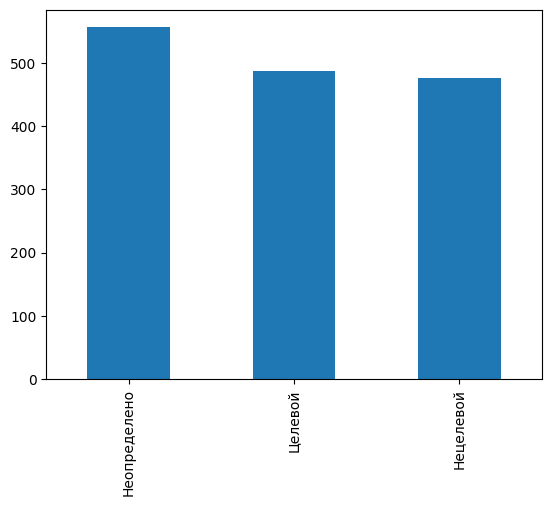

In [161]:
# Соотношение классов
Paveletskaya_city_new_df['Класс'].value_counts().plot.bar()

##### Проект

In [162]:
Paveletskaya_city_new_df.shape

(1518, 76)

In [163]:
# Добавляем столбец 'Проект'
Paveletskaya_city_new_df['Проект'] = 'Paveletskaya_city'

In [164]:
Paveletskaya_city_new_df.shape

(1518, 77)

#### Анализ и сравнение датафреймов

In [165]:
# Размеры
print(Paveletskaya_df.shape)
print(Paveletskaya_city_df.shape)
print(Paveletskaya_city_new_df.shape)
print()
print(Paveletskaya_city_calls_df.shape)
print(Paveletskaya_city_new_calls_df.shape)

(1211, 77)
(9327, 77)
(1518, 77)

(1000, 5)
(1413, 5)


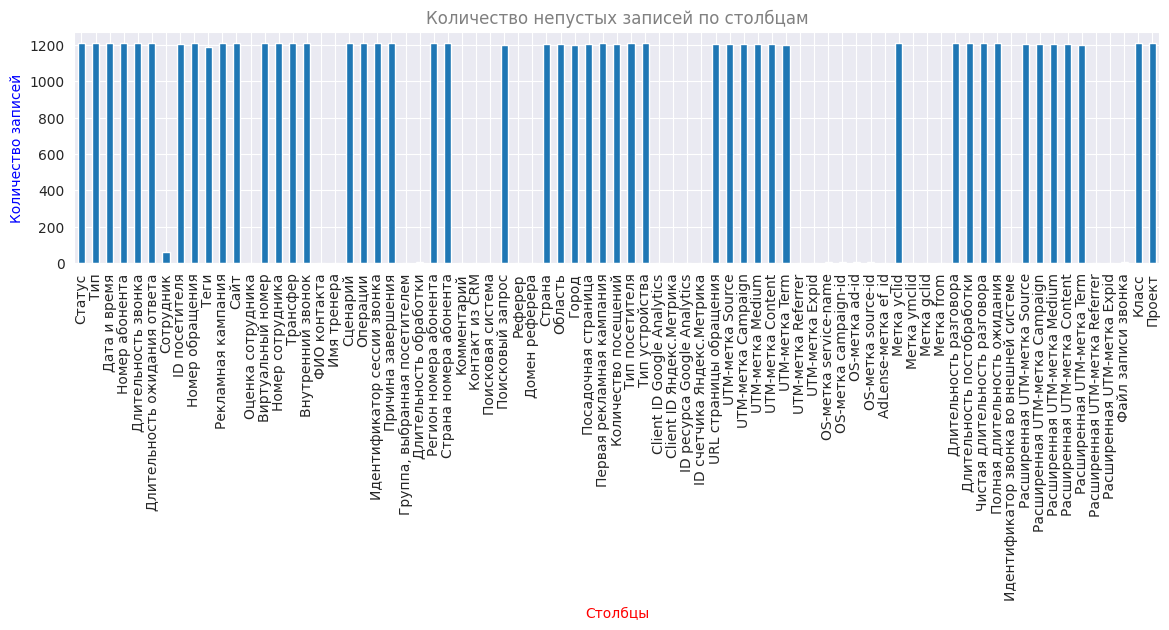

In [167]:
# @title График Data.count
Data = Paveletskaya_df # @param {type:"raw"}
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(14,3))
counts = Data.count()
ax = counts.plot.bar()
ax.set_xlabel('Столбцы', c='r')
ax.set_ylabel('Количество записей', c='b')
ax.set_title('Количество непустых записей по столбцам', c='gray')

plt.show()

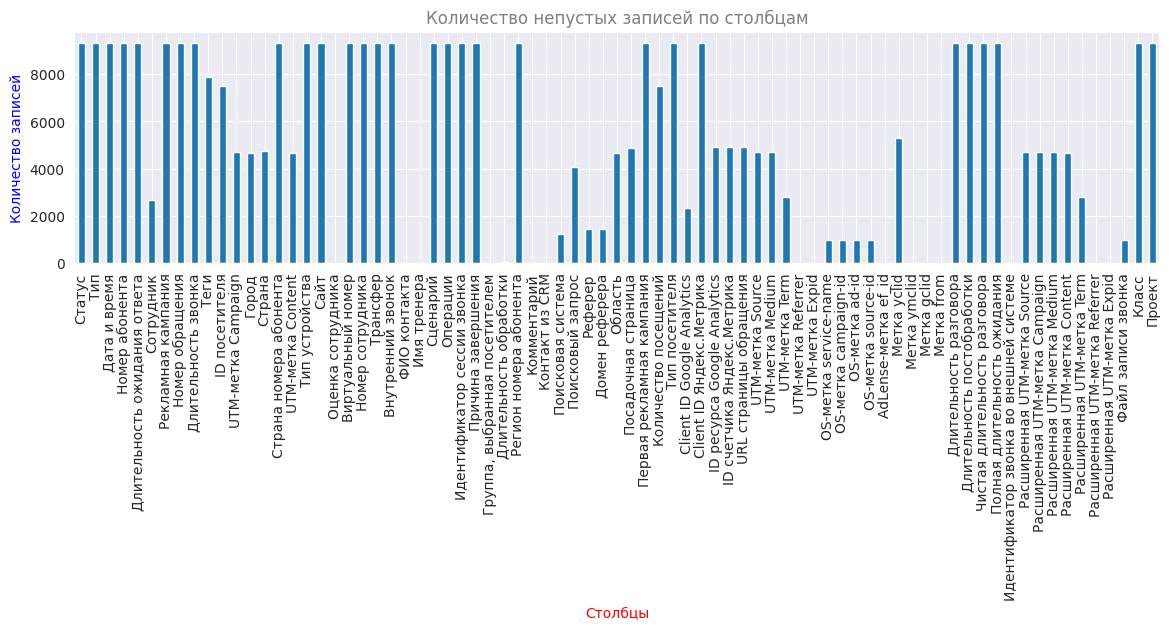

In [168]:
# @title График Data.count
Data = Paveletskaya_city_df # @param {type:"raw"}
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(14,3))
counts = Data.count()
ax = counts.plot.bar()
ax.set_xlabel('Столбцы', c='r')
ax.set_ylabel('Количество записей', c='b')
ax.set_title('Количество непустых записей по столбцам', c='gray')

plt.show()

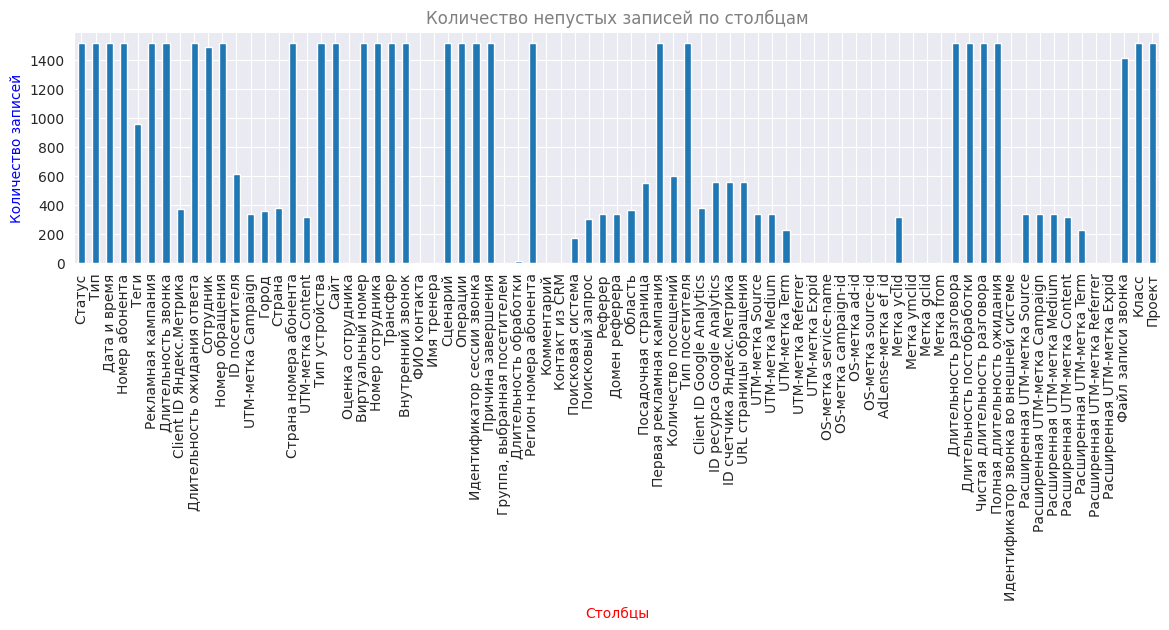

In [169]:
# @title График Data.count
Data = Paveletskaya_city_new_df # @param {type:"raw"}
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(14,3))
counts = Data.count()
ax = counts.plot.bar()
ax.set_xlabel('Столбцы', c='r')
ax.set_ylabel('Количество записей', c='b')
ax.set_title('Количество непустых записей по столбцам', c='gray')

plt.show()

#### Сохранение датафреймов

In [170]:
# Сортируем по столбцу 'Идентификатор сессии звонка'
Paveletskaya_df = Paveletskaya_df.sort_values('Идентификатор сессии звонка')
Paveletskaya_city_df = Paveletskaya_city_df.sort_values('Идентификатор сессии звонка')
Paveletskaya_city_new_df = Paveletskaya_city_new_df.sort_values('Идентификатор сессии звонка')
Paveletskaya_df.index = range(Paveletskaya_df.shape[0])
Paveletskaya_city_df.index = range(Paveletskaya_city_df.shape[0])
Paveletskaya_city_new_df.index = range(Paveletskaya_city_new_df.shape[0])

In [171]:
# Сохраняем Paveletskaya_df в pkl
with open(df_path + 'Paveletskaya_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_df, f)

# Сохраняем Paveletskaya_city_df в pkl
with open(df_path + 'Paveletskaya_city_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_df, f)

# Сохраняем Paveletskaya_city_new_df в pkl
with open(df_path + 'Paveletskaya_city_new_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_new_df, f)